<a href="https://colab.research.google.com/github/khac/DevSOM/blob/master/self_org_feature_map_developmental_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.2-cp36-none-any.whl size=7263 sha256=bc56485facbb22fd8475f215f9c8e89fc9cea0411ea1d7e9f219c448d20b2aa2
  Stored in directory: /root/.cache/pip/wheels/4a/46/e1/605a71c70f6a19f16b44fc309f6557127591c69969476cf5d1
Successfully built minisom


In [0]:
!pip install matplotlib==3.0.3

     |████████████████████████████████| 13.0MB 6.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1



*   Each data point will be 28x28 so total features will be 784.
*   And the self organizing feature map will be 20x20, total 400 neurons
*   So the total number of weight matrix will be  784 i.e. vector form of the MNIST data and the size of the self organizing feature map will be 400 so the weight matrix will be 784x400



In [0]:
def initialization_of_weights(size_of_feature_map = (20,20)):
  """
  This function is used to create the random weight matrix
  :param size_of_feature_map: size of the 2d array of feature map
  :return: random weight matrix
  :rtype: numpy.ndarray
  """
  return np.random.rand(784, size_of_feature_map[0]*size_of_feature_map[1])

In [0]:
def mnist_data_assignment():
  """
  :return: X,y is the MNIST dataset containing the 70,000 digits and corresponding labels
  :rtype: numpy.ndarray,numpy.ndarray
  """
  X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
  X = X / 255.
  return X,y

In [0]:
def finding_winner_neuron(XX, self_organizing_feature_map_weights, size_of_feature_map=(20,20)):
  """
  :param XX: One of the 70,000 data points
  :param self_organizing_feature_map_weights: 2-d weight matrix
  :param size_of_feature_map: Size of the 2-d feature map choosen
  :return: a 2-d one-hot encoded array where 1 is assigned to the winner neuron, index of the winner neuron in the 2-d grid, the indexing starts from 0
  :rtype: numpy.ndarray, numpy.ndarray(numpy.int64, numpy.int64)
  """
  XX = np.reshape(XX, (784, 1))
  temp = np.absolute(np.subtract(self_organizing_feature_map_weights, XX))
  distance = np.sum(temp, axis=0)
  distance[distance>np.amin(distance)]=0
  distance[distance>0]=1
  distance = distance.reshape(size_of_feature_map)
  return distance, np.array([np.argmax(distance, axis=0).sum(), np.argmax(distance, axis=1).sum()])

In [0]:
def distance_from_winner_neuron(winner_location, size_of_feature_map=(20,20)):
  """
  :ptype winner_location: np.array
  :param winner_location: 2-d array of the location the winner neuron
  :param size_of_feature_map: the size of the winner neuron default (20,20)
  :return: euclidean distance of each neuron from winner neuron
  :rtype: np.array
  """
  distance_from_winner = np.empty(size_of_feature_map)
  for i in range(size_of_feature_map[0]):
    for j in range(size_of_feature_map[1]):
      distance_from_winner[i][j] = np.linalg.norm((np.array([i,j])-winner_location))
  return distance_from_winner

In [0]:
def lambda_function(distance_from_winner_matrix, tau_n=0.5, step=0, sigma_0=0.5):
  sigma_t = sigma_0*np.exp(-step/tau_n)
  delta_matrix = np.exp(-np.square(distance_from_winner_matrix)/(2*np.square(sigma_t)))
  return delta_matrix

Lambda function will output matrix of size of the original feature map, by default 20x20. Where as the weight matrix is 784x(multiplication of dimension of SOFM)

In [0]:
def weight_update(XX, weight_matrix, delta_matrix, eta=0.5, shape_of_feature_map = (20,20)):
  eta_and_subtraction = eta*(XX.reshape(784,1)-weight_matrix)
  weight_update = delta_matrix.reshape(1, shape_of_feature_map[0]*shape_of_feature_map[1])*eta_and_subtraction
  return weight_update

This cell will do initializations on weight matrix,

In [0]:
self_organizing_feature_map_weights = initialization_of_weights()
X,y = mnist_data_assignment()
winner_compilations = {'0': [],
                       '1': [],
                       '2': [],
                       '3': [],
                       '4': [],
                       '5': [],
                       '6': [],
                       '7': [],
                       '8': [],
                       '9': []}

In [0]:
X_0, y_0 = X[y=='0'], y[y=='0'] 
X_1, y_1 = X[y=='1'], y[y=='1'] 
X_2, y_2 = X[y=='2'], y[y=='2'] 
X_3, y_3 = X[y=='3'], y[y=='3'] 
X_4, y_4 = X[y=='4'], y[y=='4'] 
X_5, y_5 = X[y=='5'], y[y=='5'] 
X_6, y_6 = X[y=='6'], y[y=='6'] 
X_7, y_7 = X[y=='7'], y[y=='7'] 
X_8, y_8 = X[y=='8'], y[y=='8'] 
X_9, y_9 = X[y=='9'], y[y=='9'] 

In [0]:
X_train = np.vstack((X_0[:100], X_1[:100], X_2[:100], X_3[:100], X_4[:100], X_5[:100], X_6[:100], X_7[:100], X_8[:100], X_9[:100] ))
y_train = np.hstack((y_0[:100], 
                     y_1[:100], 
                     y_2[:100], 
                     y_3[:100], 
                     y_4[:100], 
                     y_5[:100], 
                     y_6[:100], 
                     y_7[:100], 
                     y_8[:100], 
                     y_9[:100] ))
print(X_train.shape, y_train.shape)

(1000, 784) (1000,)


In [0]:
np.random.seed(seed=12)
np.random.shuffle(X_train) 
np.random.shuffle(y_train)

In [0]:
X.shape

(70000, 784)

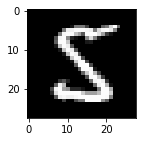


6



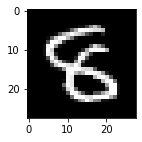


6



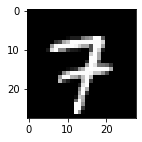


3



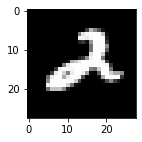


7



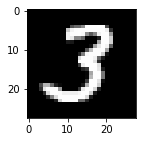


4



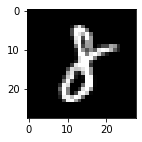


9



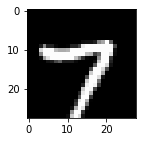


8



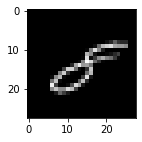


9



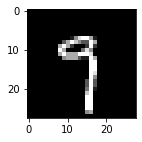


7



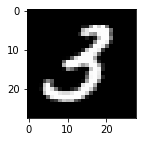


3



In [0]:
import matplotlib.pyplot as plt
for i in range(10):
  pixels = X_train[i].reshape((28, 28))
  plt.figure(figsize=(2, 2))
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print('\n{}\n'.format(y_train[i]))

In [0]:
from minisom import MiniSom    
som = MiniSom(6, 6, 784, sigma=3, learning_rate=0.1) # initialization of 12x12 SOM
som.train_random(X, 350000, verbose=True) # trains the SOM with 100 iterations

 [ 350000 / 350000 ] 100% - 0:00:00 left 
 quantization error: 6.531104279374926
 topographic error: 0.5975428571428572


In [0]:
print(som.get_weights().shape)

(6, 6, 784)


0 0


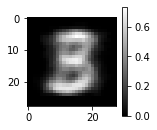

1 0


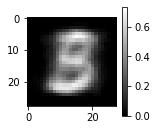

2 0


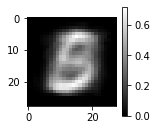

3 0


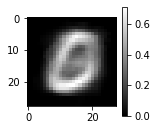

4 0


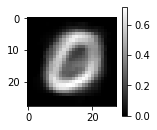

5 0


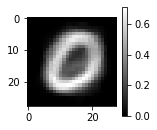

0 1


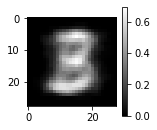

1 1


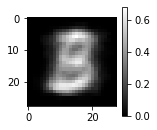

2 1


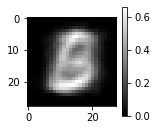

3 1


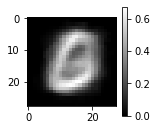

4 1


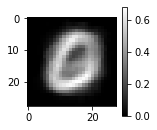

5 1


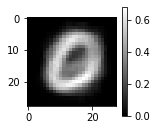

0 2


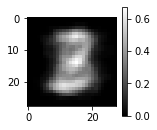

1 2


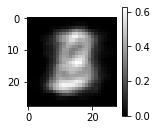

2 2


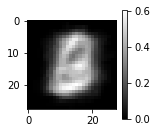

3 2


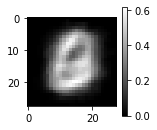

4 2


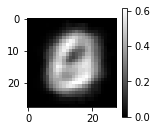

5 2


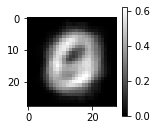

0 3


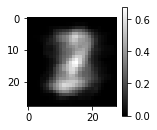

1 3


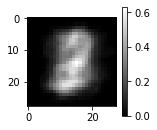

2 3


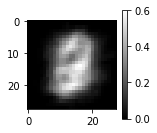

3 3


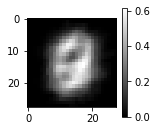

4 3


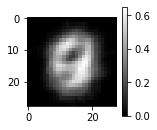

5 3


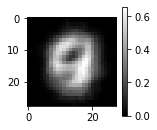

0 4


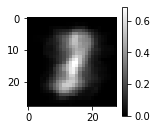

1 4


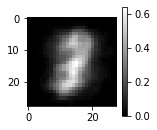

2 4


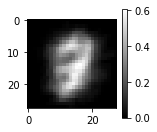

3 4


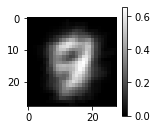

4 4


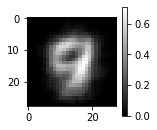

5 4


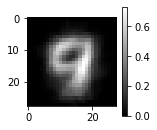

0 5


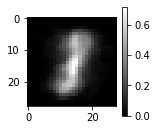

1 5


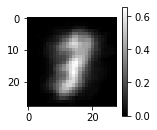

2 5


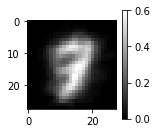

3 5


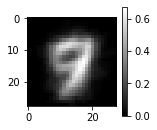

4 5


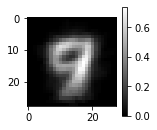

5 5


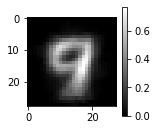

In [0]:
j=6
for i in range(j*j):
  plt.figure(figsize=(2, 2))
  heatmap = plt.imshow(som.get_weights()[i%j, i//j, :].reshape(28,28), cmap='gray', interpolation='nearest')
  print(i%j, i//j)
  plt.colorbar(heatmap)
  plt.show()

In [0]:
plt.figure(figsize=(8, 8))
cmap = plt.cm.rainbow(np.linspace(0.0, 1.0, 10))
for x, t in zip(X_train, y_train):  # scatterplot
    w = som.winner(x)
    plt. text(w[0]+.5,  w[1]+.5,  t,
              color=cmap[int(t)], fontdict={'weight': 'bold',  'size': 41})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

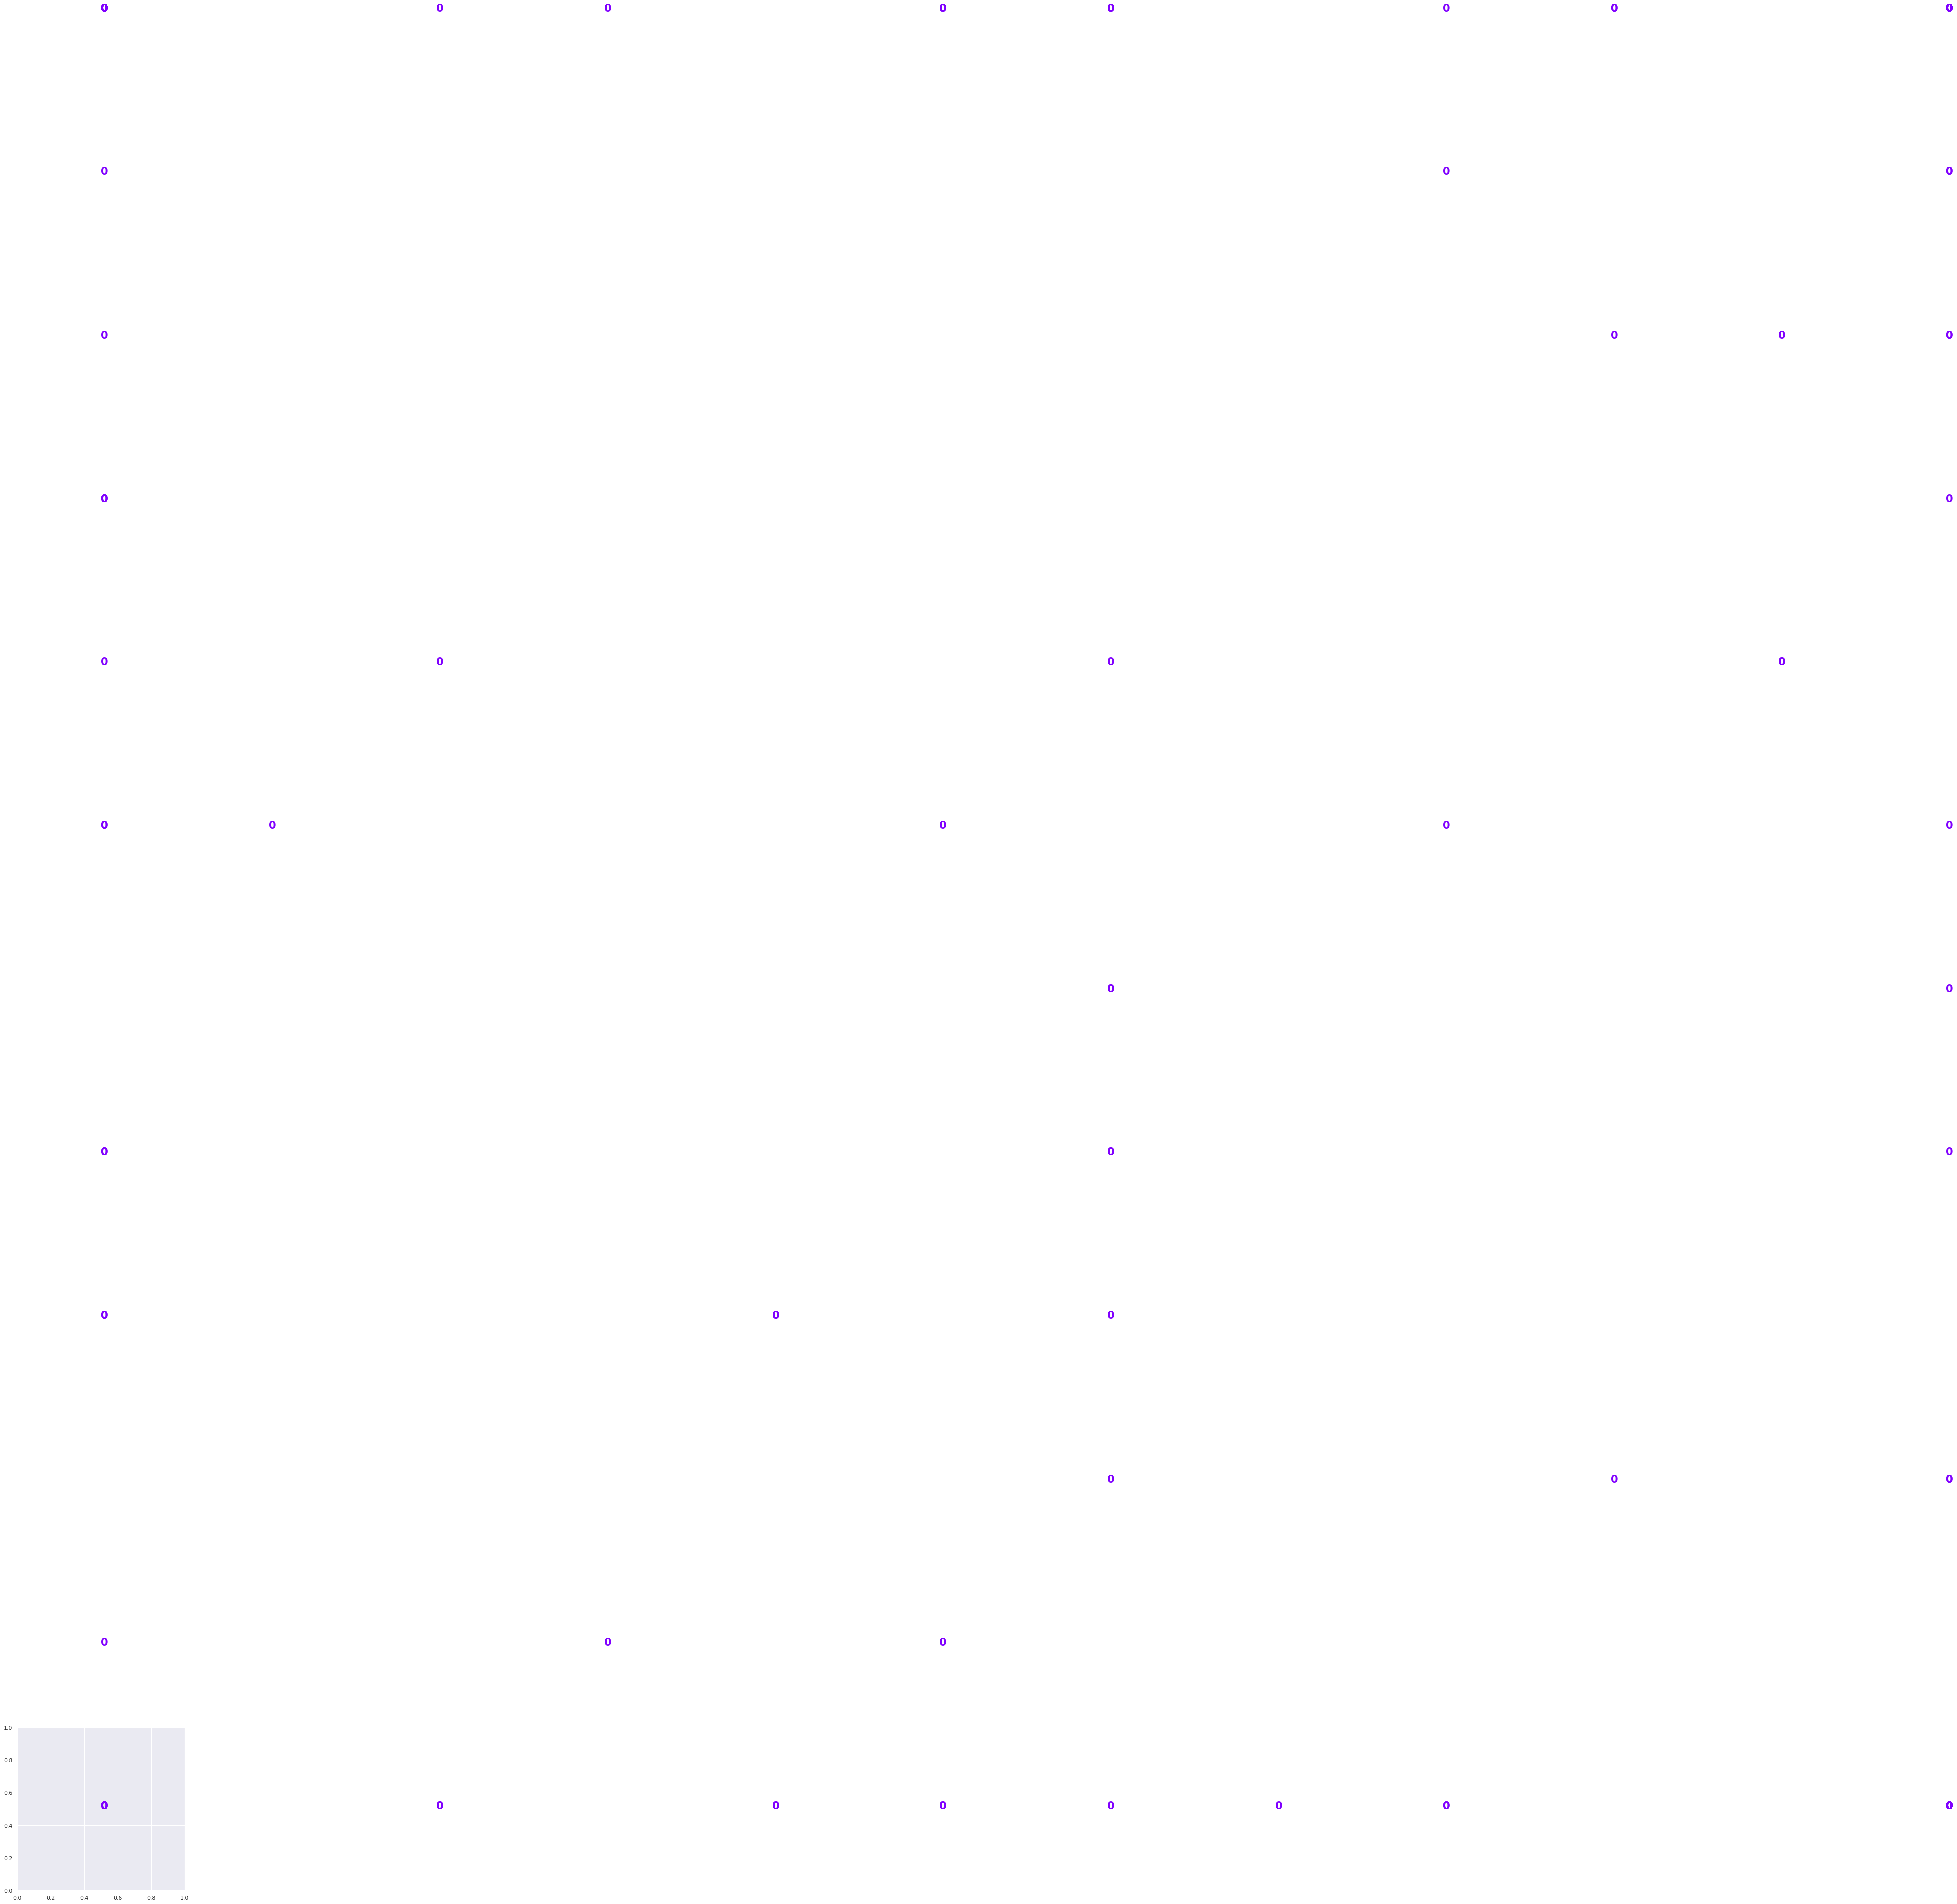

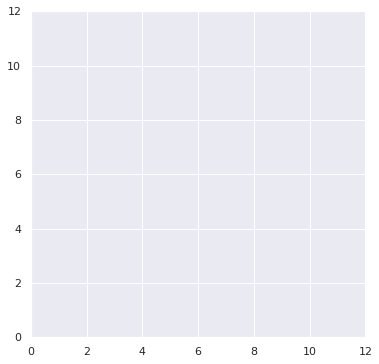

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

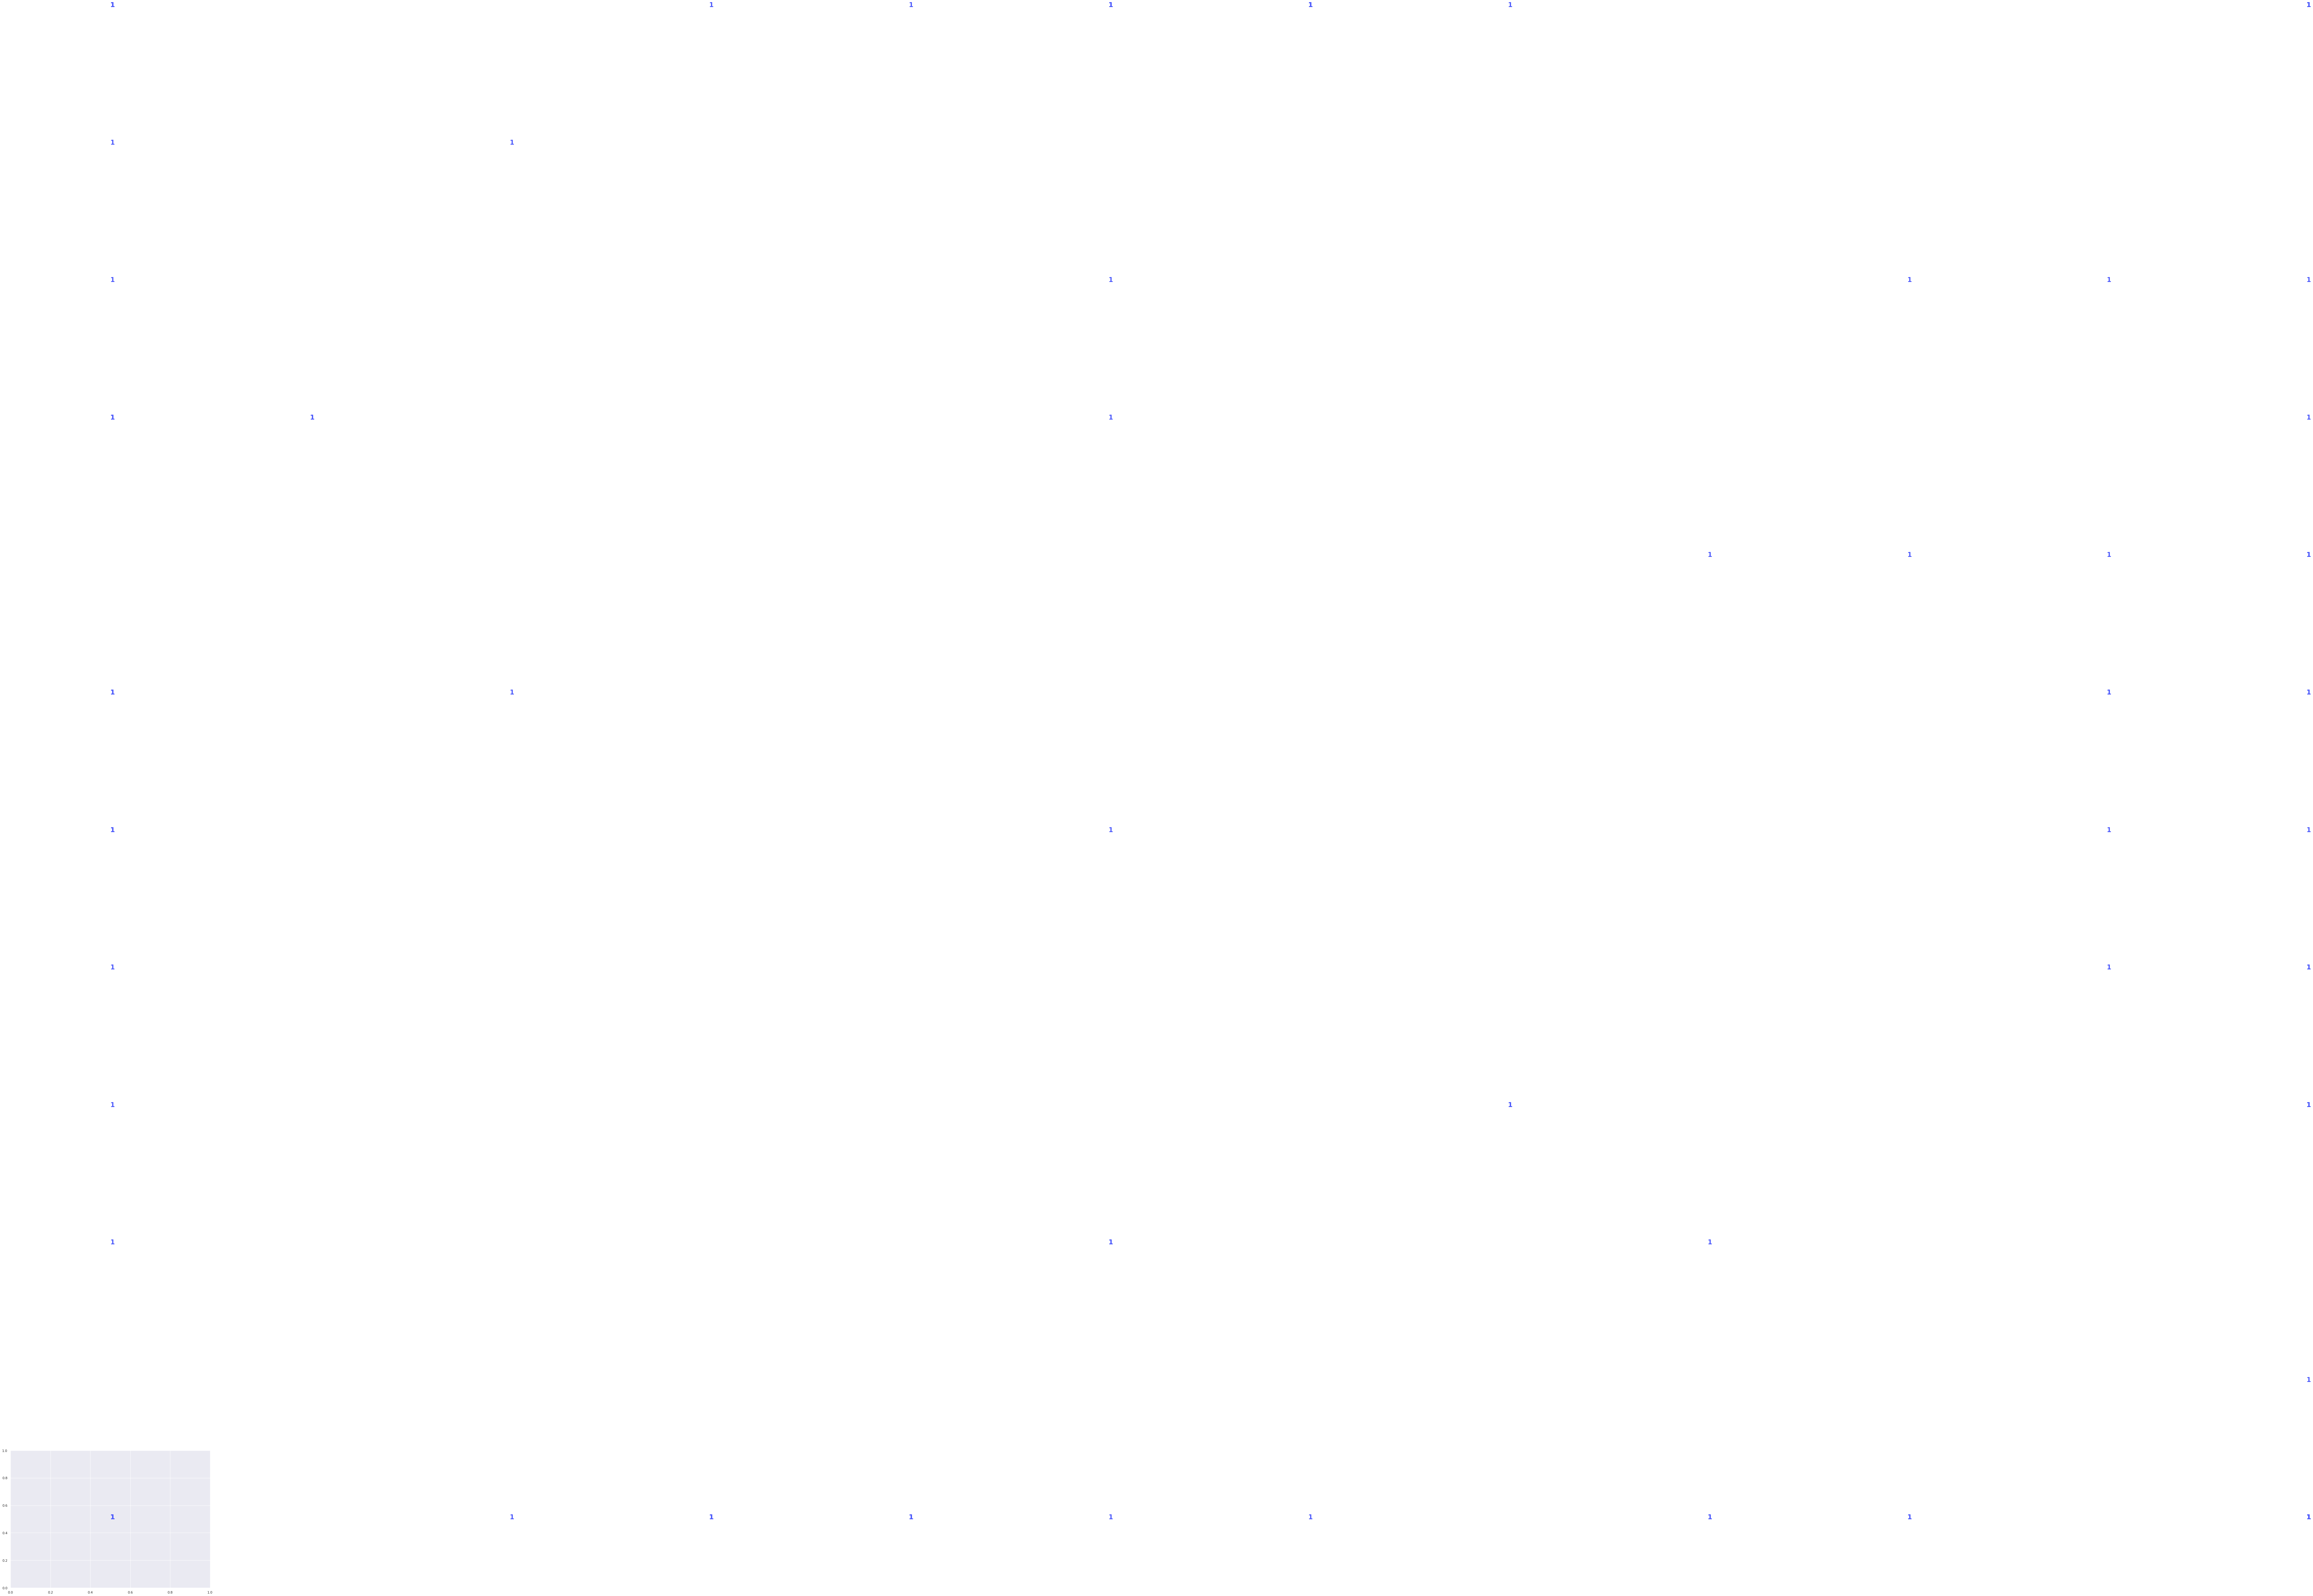

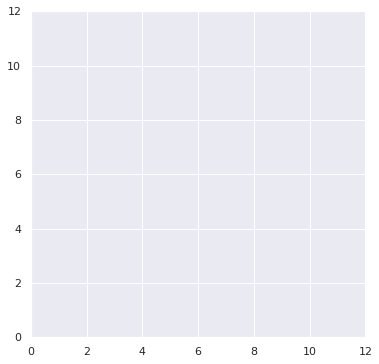

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

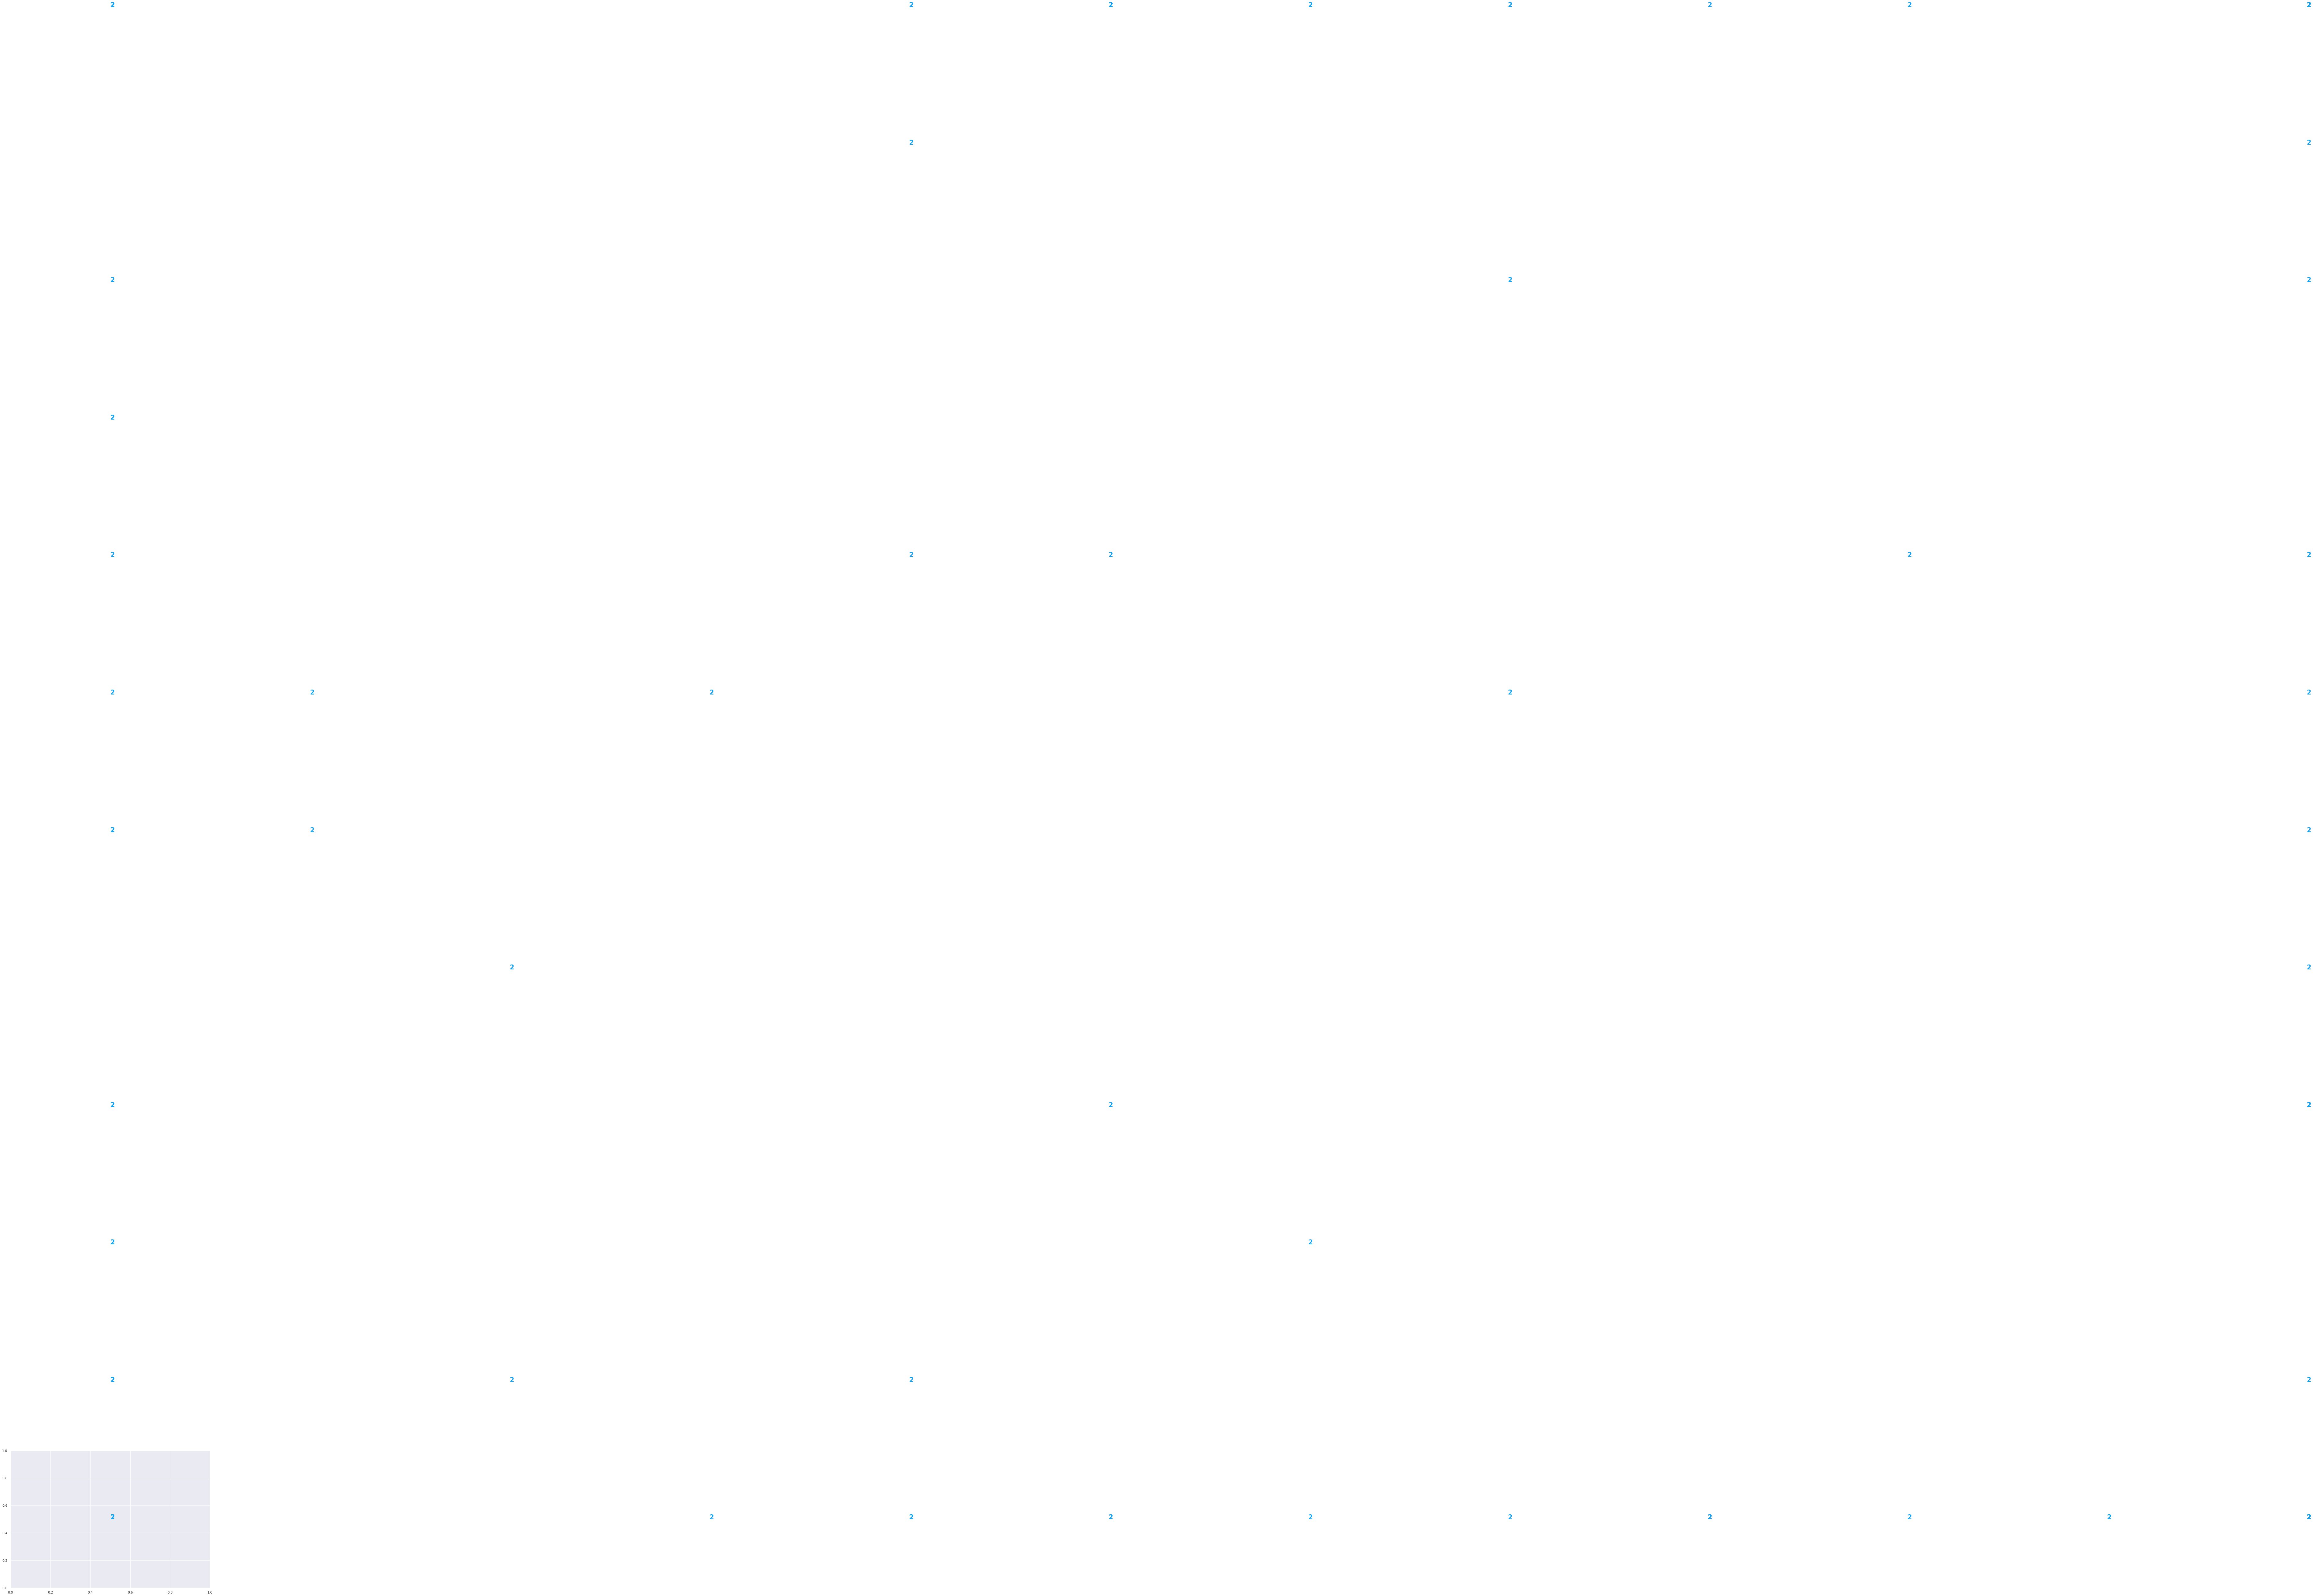

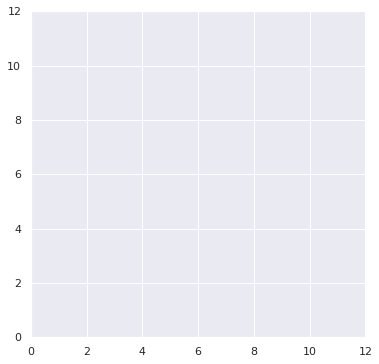

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

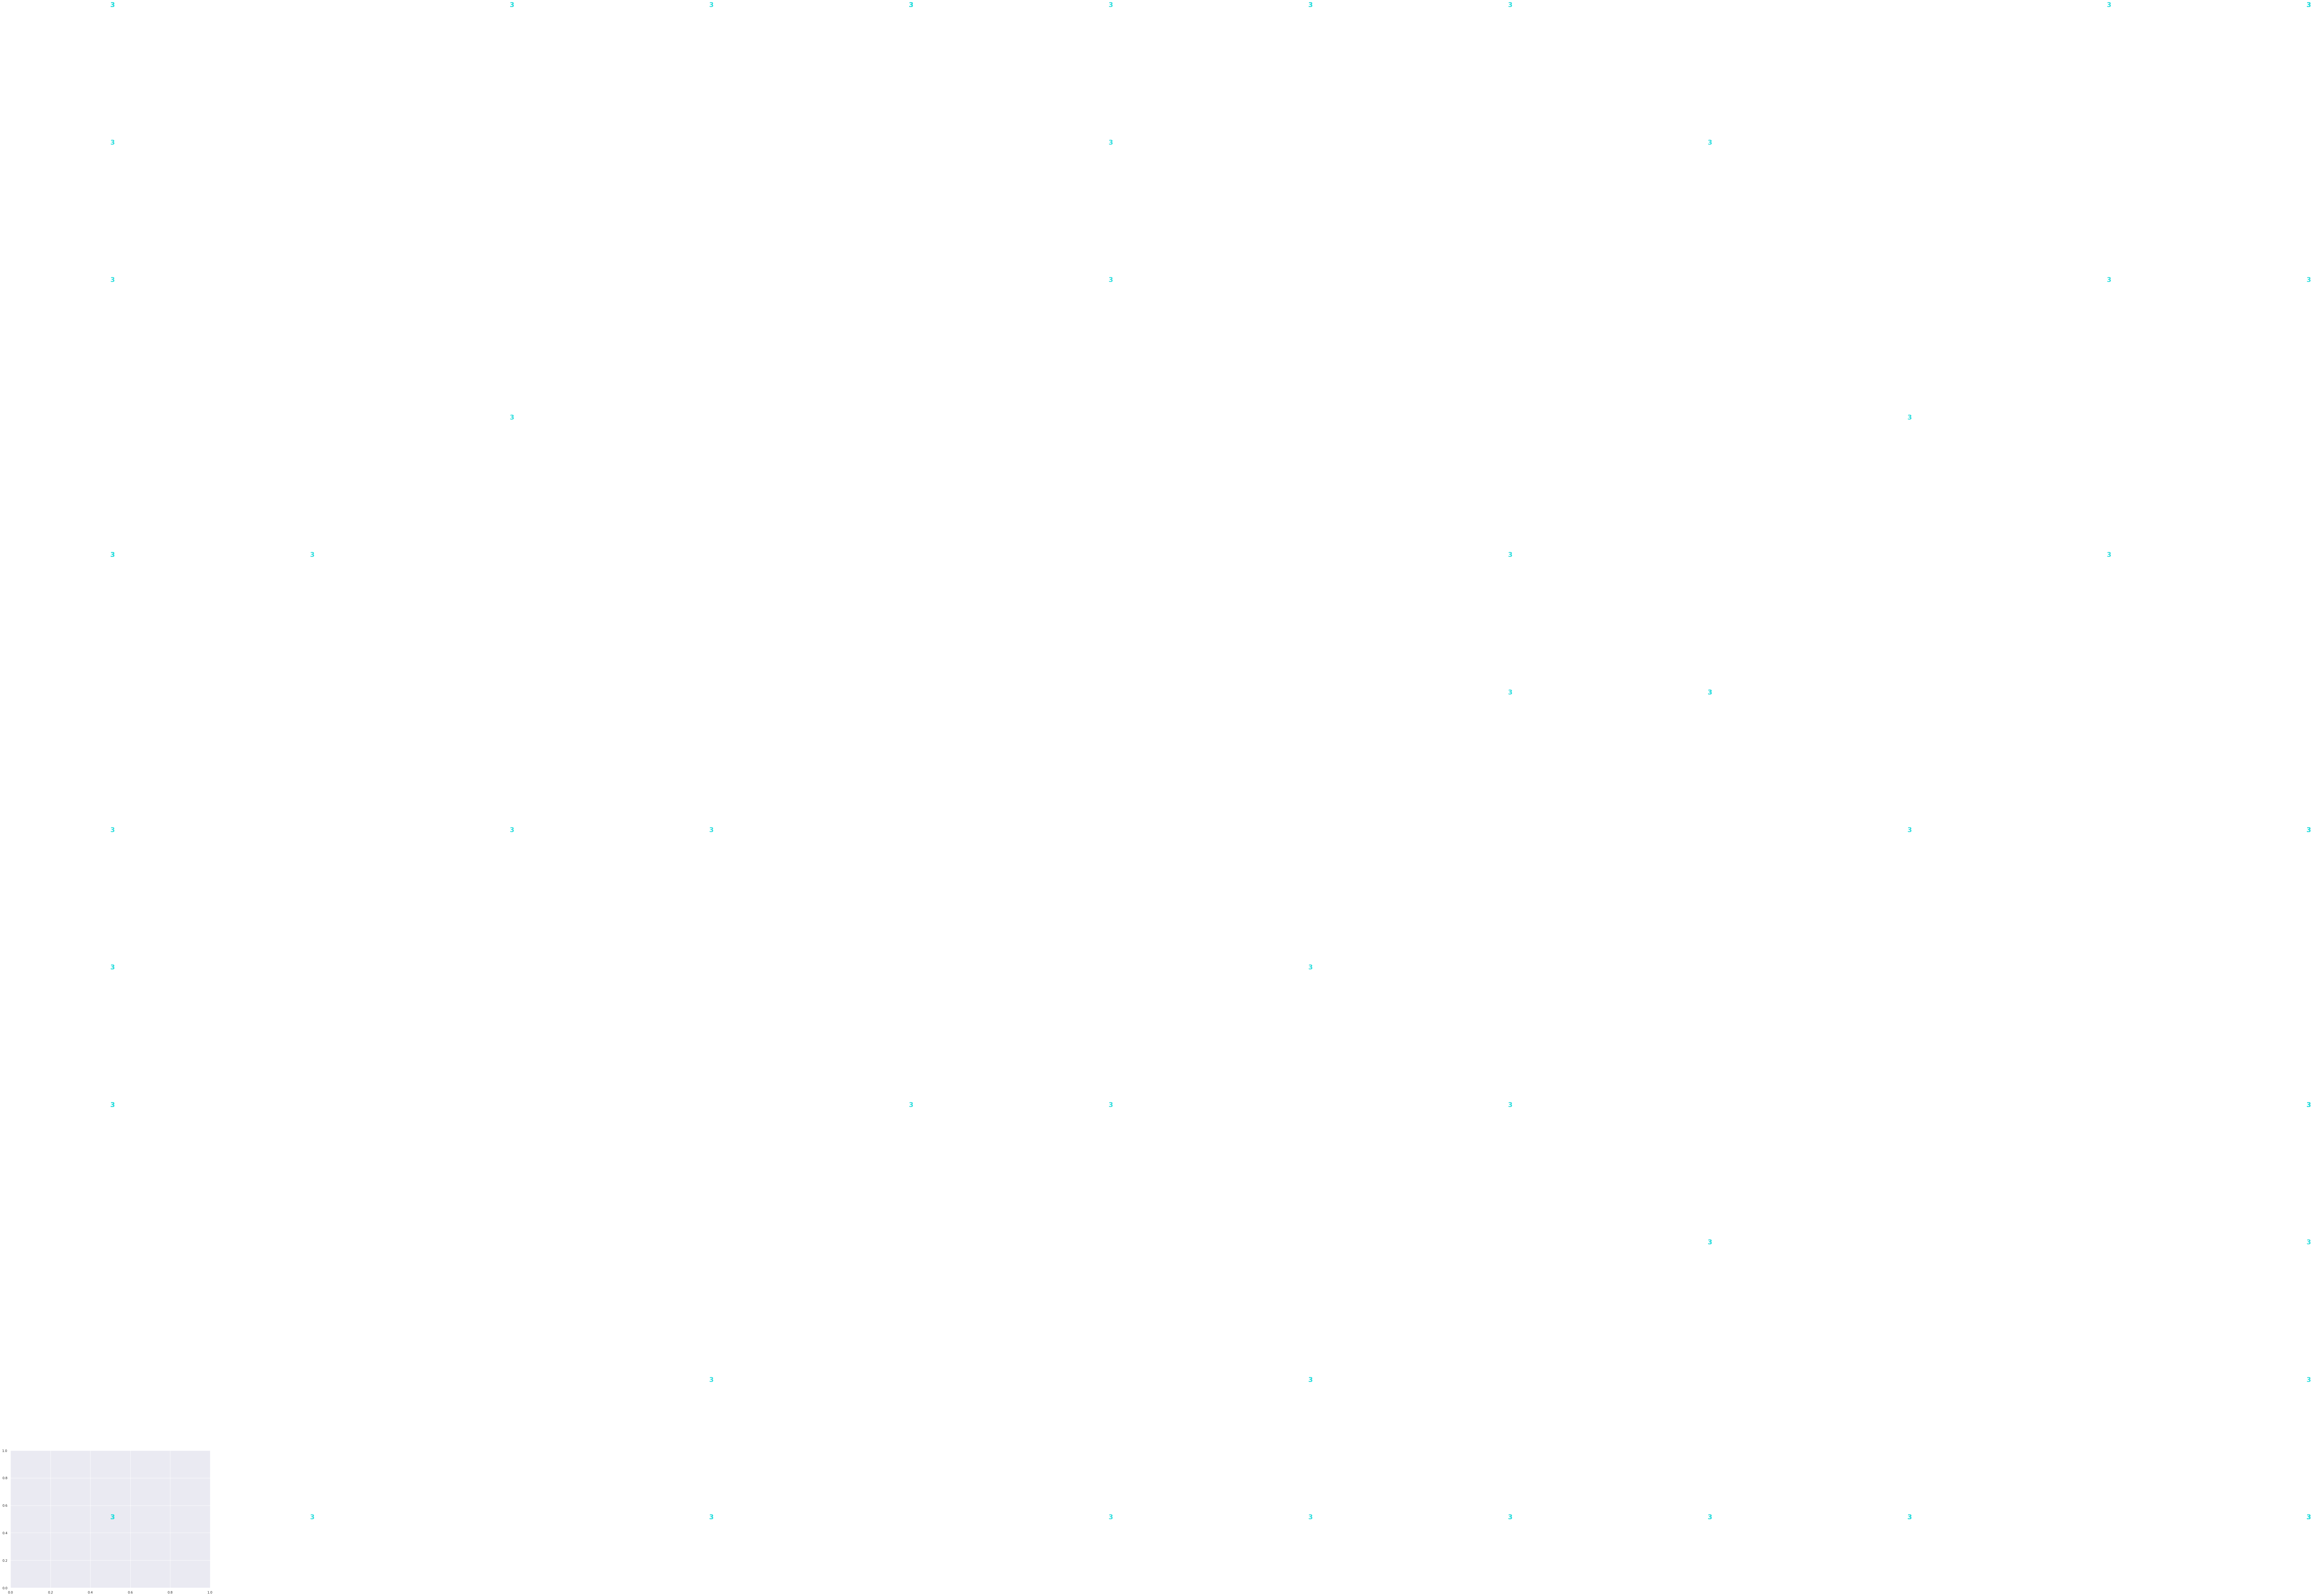

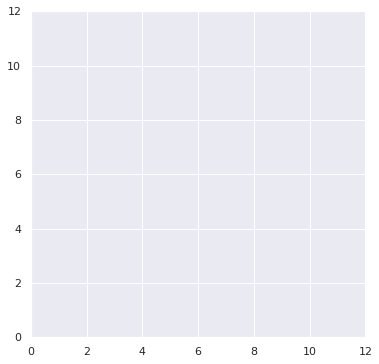

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

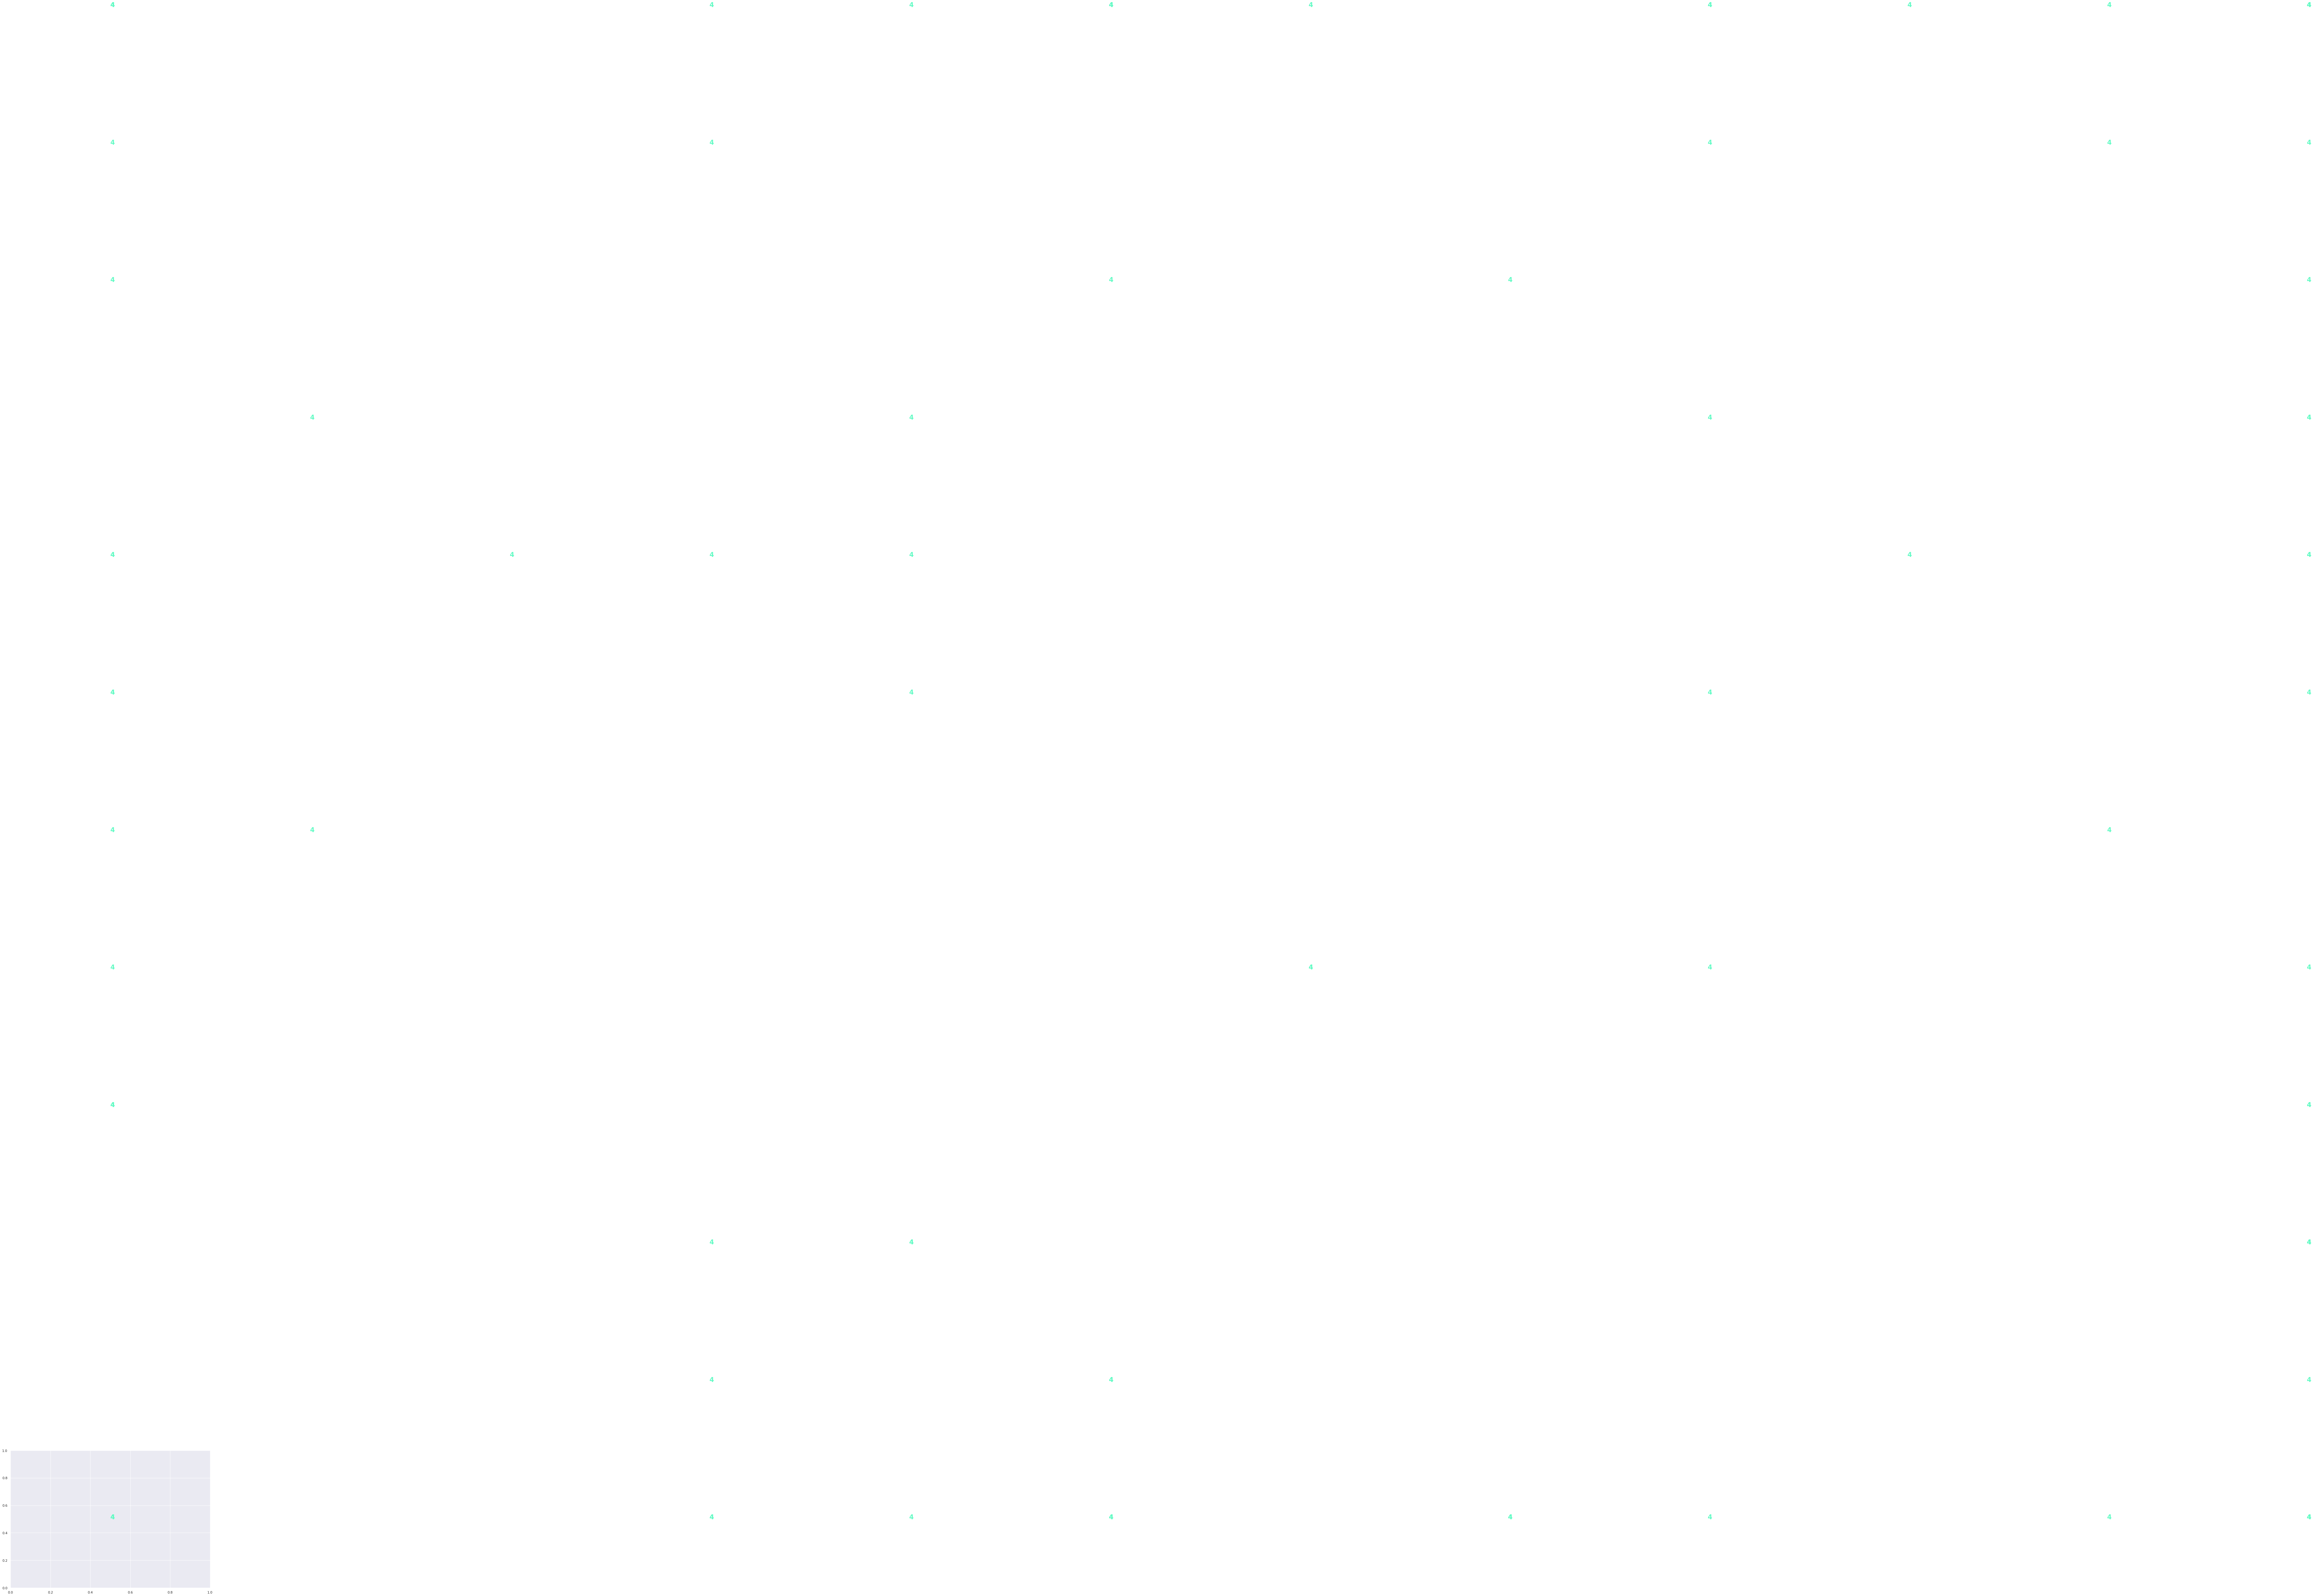

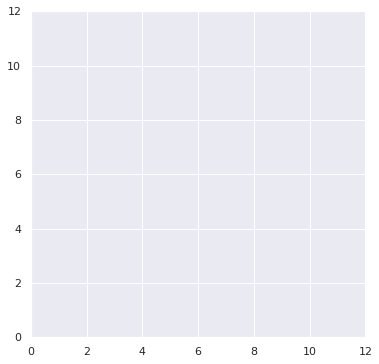

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

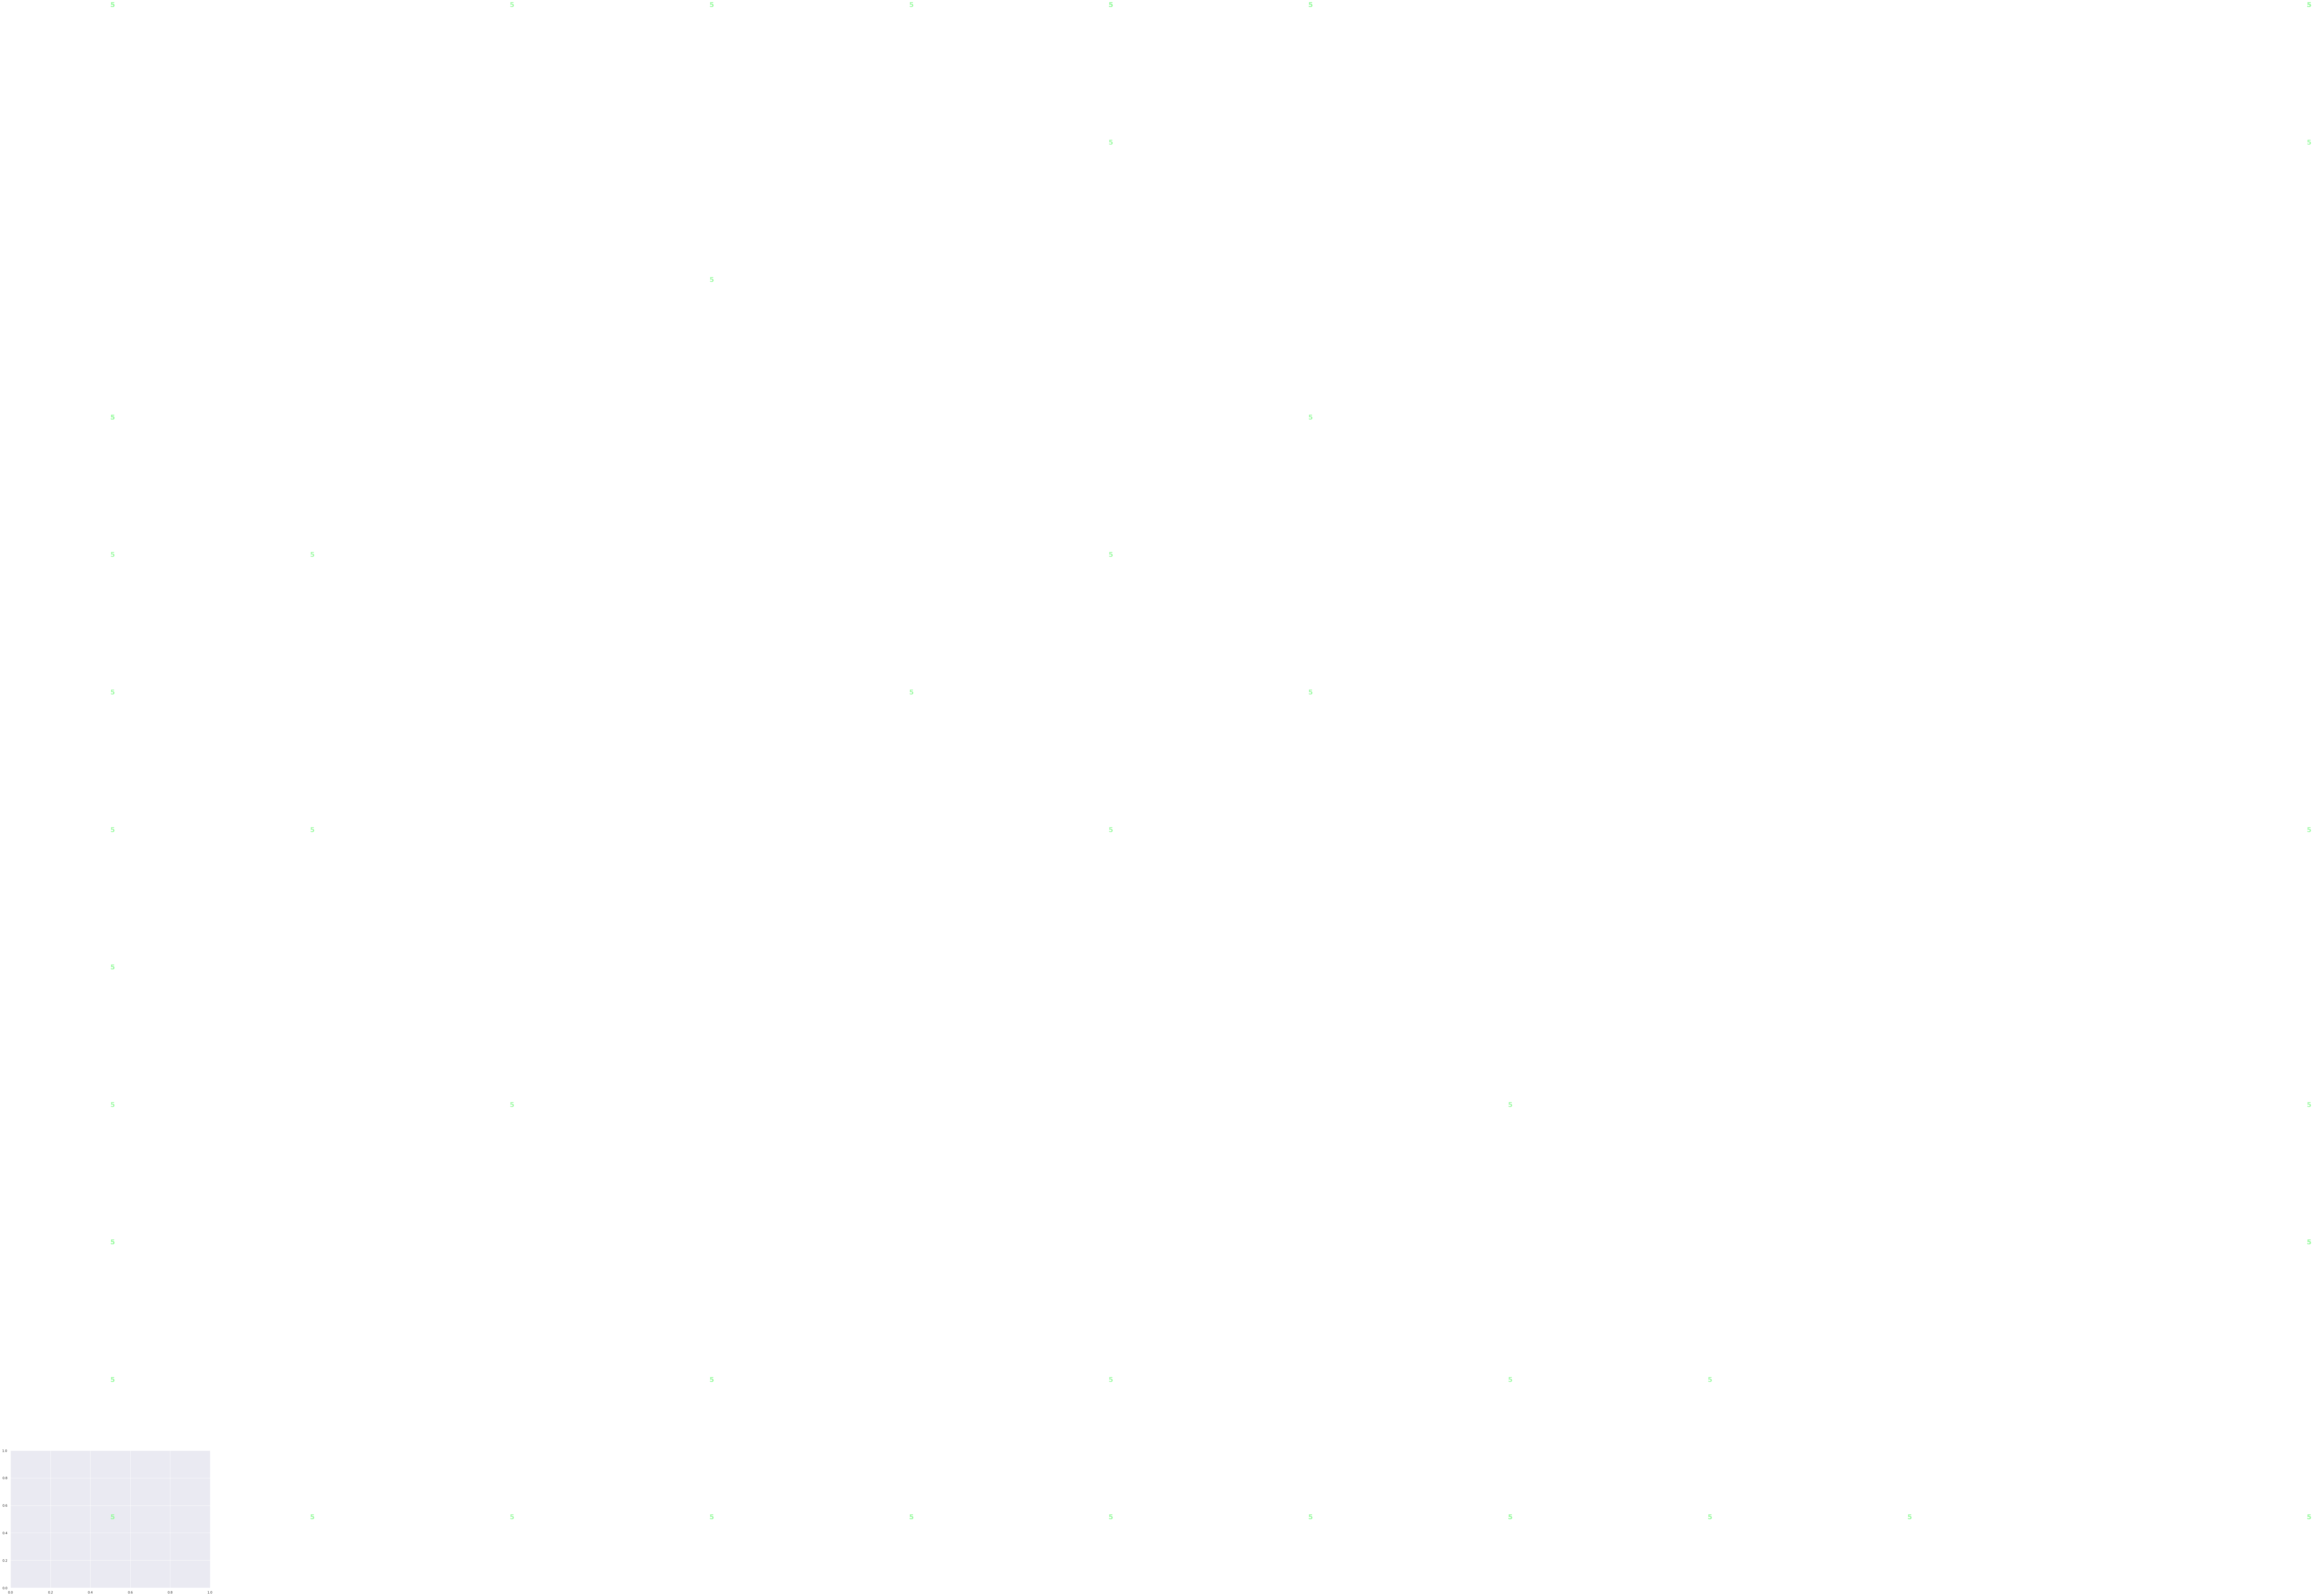

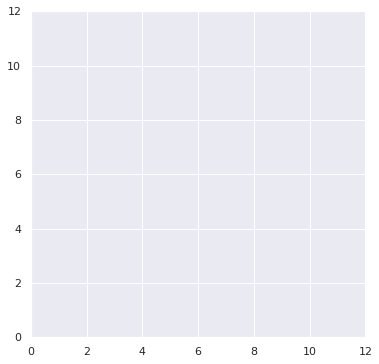

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

KeyboardInterrupt: ignored

In [0]:
plt.figure(figsize=(6, 6))
cmap = plt.cm.rainbow(np.linspace(0.0, 1.0, 10))
for i in range(10):
  x_i = y==str(i)
  for x, t in zip(X[x_i], y[x_i]):  # scatterplot
      w = som.winner(x)
      plt. text(w[0]+.5,  w[1]+.5,  t,
                color=cmap[int(t)], fontdict={'weight': 'bold',  'size': 21})
  plt.figure(figsize=(6, 6))
  plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
  plt.show()

In [0]:
import pandas as pd
import plotly.figure_factory as ff

import plotly.graph_objects as go

for i in range(10):
  x_i = y==str(i)
  map1 = pd.DataFrame(np.zeros((12, 12)), index=range(1,13), columns=range(1,13))
  for x, t in zip(X[x_i], y[x_i]):  # scatterplot
      w = som.winner(x)
      map1[w[0]+1][w[1]+1] += 1
  print(i)    
  fig = ff.create_annotated_heatmap(z = map1.values, colorscale='hot', showscale=True, zmin=0, zmax=2500)
  fig.show()

0


1


2


3


4


5


6


7


8


9


In [0]:
for i in range(70000):
  distance, winner_location = finding_winner_neuron(X[i], self_organizing_feature_map_weights)
  distance_from_winner = distance_from_winner_neuron(winner_location)
  delta_matrix = lambda_function(distance_from_winner)
  self_organizing_feature_map_weights = self_organizing_feature_map_weights + weight_update(X[i], self_organizing_feature_map_weights, delta_matrix)
  winner_compilations[y[i]].append(winner_location)

Rough Work

In [0]:
x = som._weights.copy()

In [0]:
x.shape

(6, 6, 784)

In [0]:
x = np.repeat(x, 2, axis=1)
x = np.repeat(x, 2, axis=0)
print(x.shape)

(12, 12, 784)


0 0


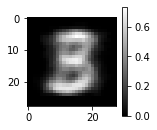

1 0


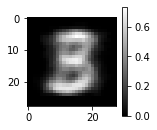

2 0


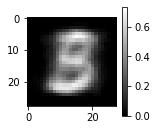

3 0


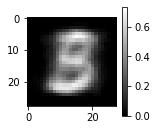

4 0


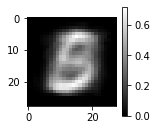

5 0


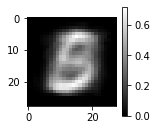

6 0


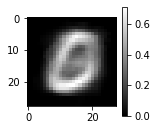

7 0


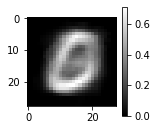

8 0


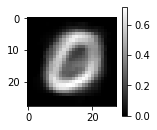

9 0


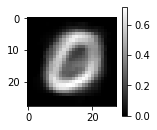

10 0


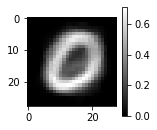

11 0


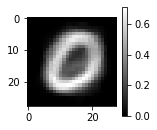

0 1


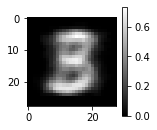

1 1


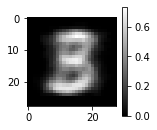

2 1


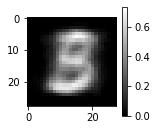

3 1


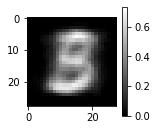

4 1


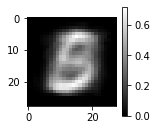

5 1


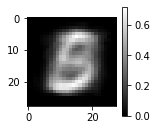

6 1


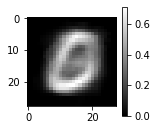

7 1


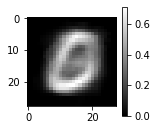

8 1


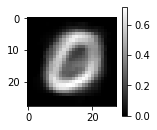

9 1


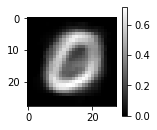

10 1


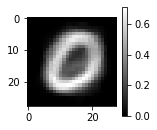

11 1


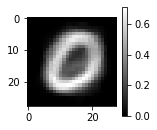

0 2


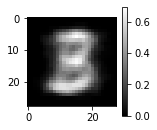

1 2


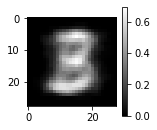

2 2


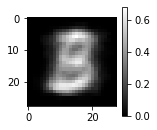

3 2


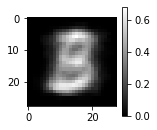

4 2


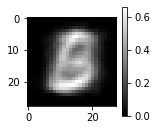

5 2


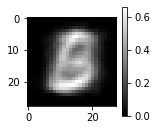

6 2


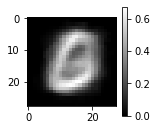

7 2


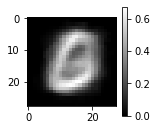

8 2


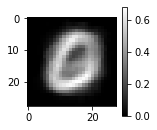

9 2


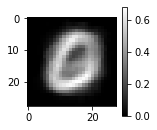

10 2


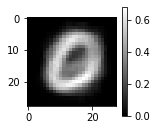

11 2


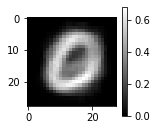

0 3


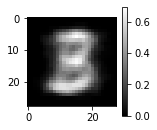

1 3


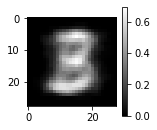

2 3


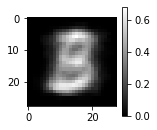

3 3


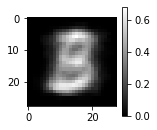

4 3


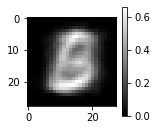

5 3


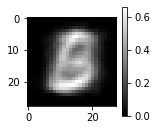

6 3


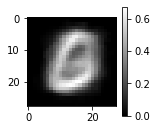

7 3


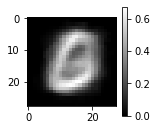

8 3


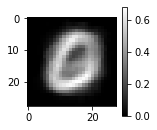

9 3


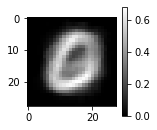

10 3


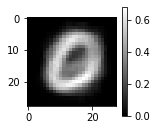

11 3


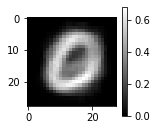

0 4


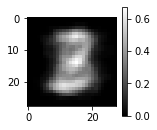

1 4


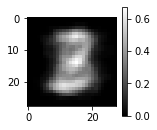

2 4


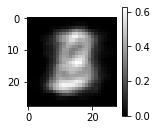

3 4


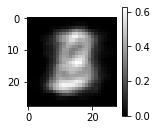

4 4


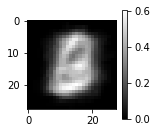

5 4


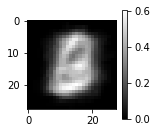

6 4


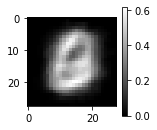

7 4


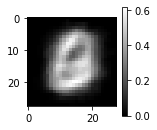

8 4


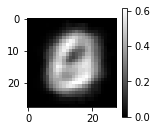

9 4


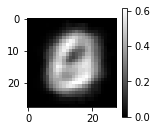

10 4


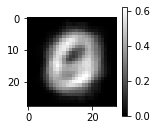

11 4


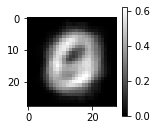

0 5


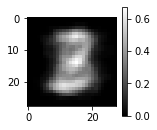

1 5


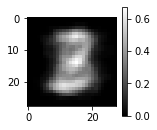

2 5


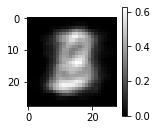

3 5


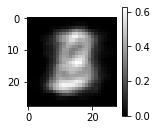

4 5


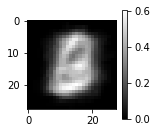

5 5


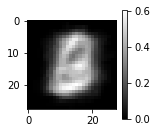

6 5


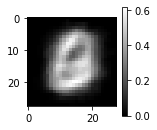

7 5


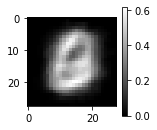

8 5


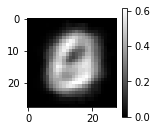

9 5


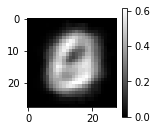

10 5


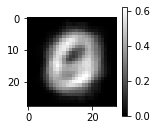

11 5


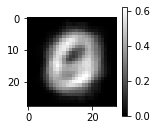

0 6


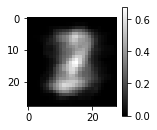

1 6


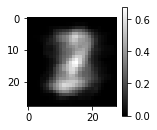

2 6


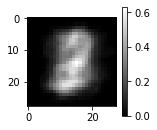

3 6


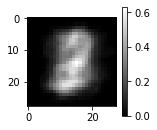

4 6


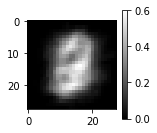

5 6


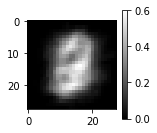

6 6


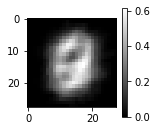

7 6


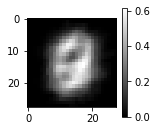

8 6


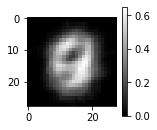

9 6


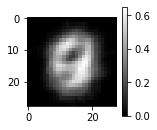

10 6


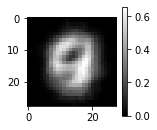

11 6


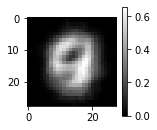

0 7


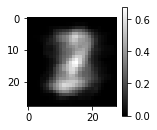

1 7


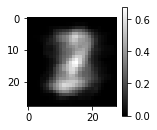

2 7


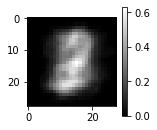

3 7


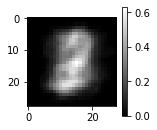

4 7


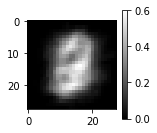

5 7


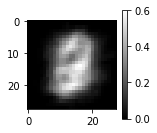

6 7


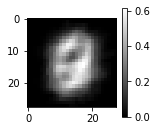

7 7


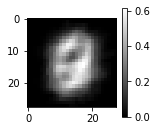

8 7


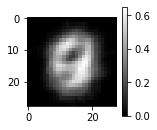

9 7


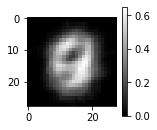

10 7


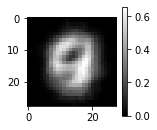

11 7


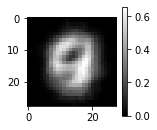

0 8


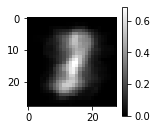

1 8


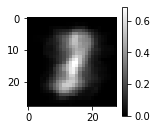

2 8


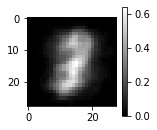

3 8


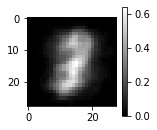

4 8


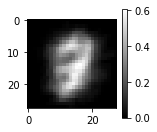

5 8


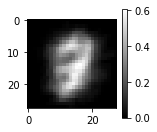

6 8


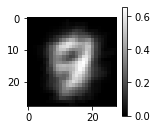

7 8


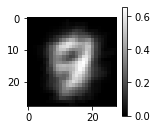

8 8


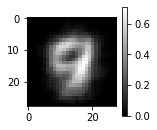

9 8


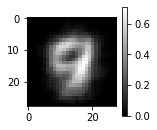

10 8


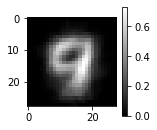

11 8


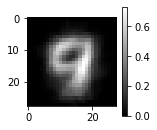

0 9


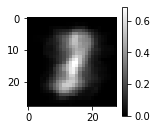

1 9


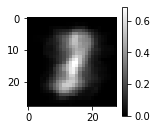

2 9


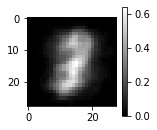

3 9


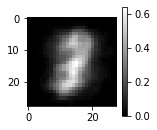

4 9


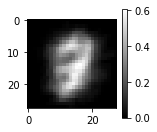

5 9


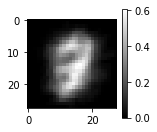

6 9


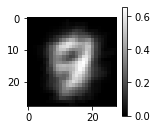

7 9


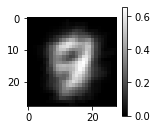

8 9


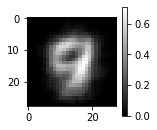

9 9


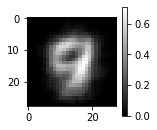

10 9


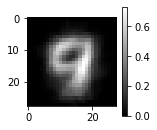

11 9


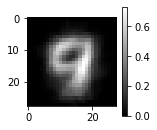

0 10


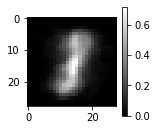

1 10


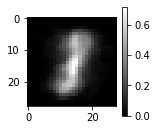

2 10


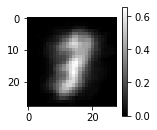

3 10


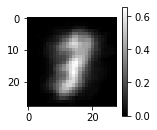

4 10


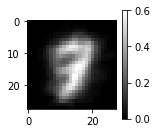

5 10


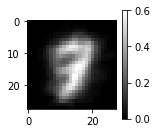

6 10


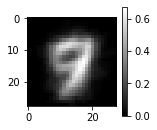

7 10


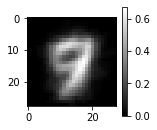

8 10


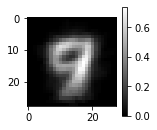

9 10


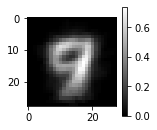

10 10


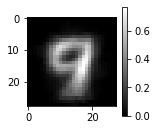

11 10


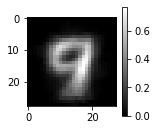

0 11


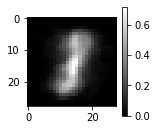

1 11


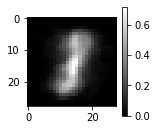

2 11


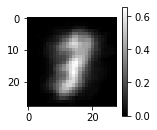

3 11


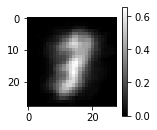

4 11


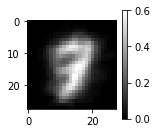

5 11


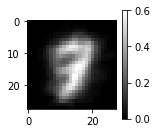

6 11


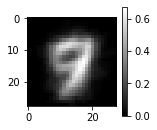

7 11


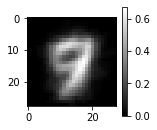

8 11


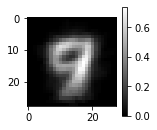

9 11


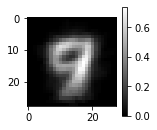

10 11


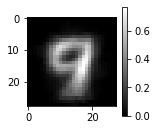

11 11


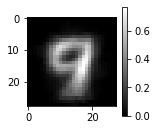

In [0]:
j=12
for i in range(j*j):
  plt.figure(figsize=(2, 2))
  heatmap = plt.imshow(x[i%j, i//j, :].reshape(28,28), cmap='gray', interpolation='nearest')
  print(i%j, i//j)
  plt.colorbar(heatmap)
  plt.show()

In [0]:
random_matrix = np.random.rand(12,12,784)*0.2 - 0.1
print(random_matrix)

[[[ 0.08834055 -0.07290394  0.07789458 ... -0.09123221  0.04738184
    0.09006414]
  [ 0.09026904 -0.00062814 -0.02664942 ...  0.05110181 -0.07935409
   -0.01283029]
  [ 0.0031782   0.00740996  0.0703461  ...  0.02668263  0.05250489
   -0.00609279]
  ...
  [-0.09709041 -0.06515653  0.01981123 ...  0.08409328  0.06761025
   -0.00325157]
  [-0.02361033 -0.05315958 -0.09293962 ... -0.08978023 -0.03207634
   -0.08319305]
  [-0.00421525 -0.05462897 -0.05847412 ...  0.05548646 -0.05581675
    0.09387371]]

 [[-0.06338476 -0.07055141 -0.04027716 ...  0.06745424 -0.04147033
   -0.08684595]
  [-0.01532367 -0.04066421 -0.04202394 ... -0.03110659 -0.09899181
   -0.03916514]
  [ 0.08669656  0.0229524  -0.01910039 ... -0.02877998 -0.09679358
   -0.00699299]
  ...
  [ 0.07605634  0.04656662 -0.00214467 ...  0.05370309  0.02942714
   -0.00115083]
  [ 0.09521988  0.01480109 -0.06164359 ... -0.0619665   0.08953208
    0.01655463]
  [ 0.02585686  0.01674207  0.04650798 ... -0.06335306 -0.09233779
   -0.

In [0]:
x = x + random_matrix

0 0


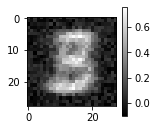

1 0


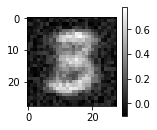

2 0


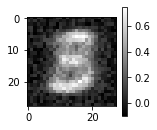

3 0


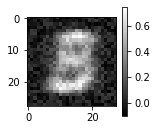

4 0


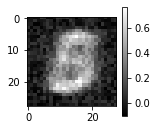

5 0


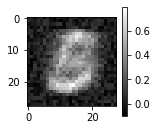

6 0


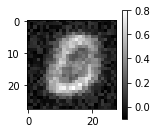

7 0


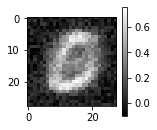

8 0


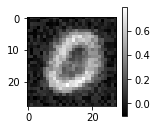

9 0


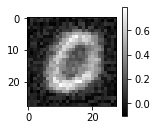

10 0


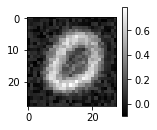

11 0


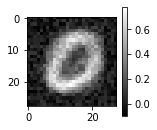

0 1


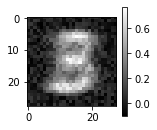

1 1


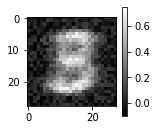

2 1


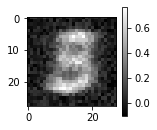

3 1


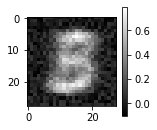

4 1


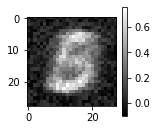

5 1


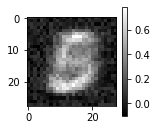

6 1


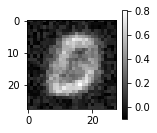

7 1


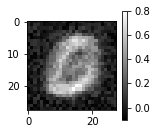

8 1


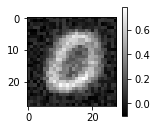

9 1


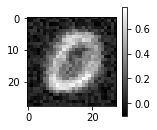

10 1


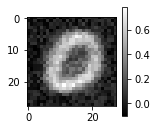

11 1


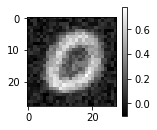

0 2


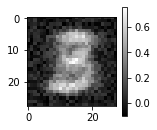

1 2


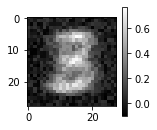

2 2


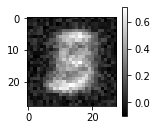

3 2


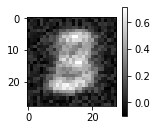

4 2


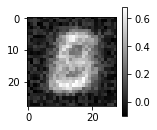

5 2


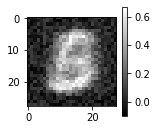

6 2


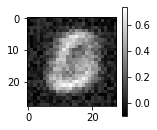

7 2


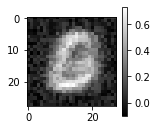

8 2


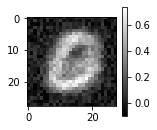

9 2


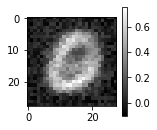

10 2


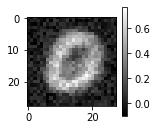

11 2


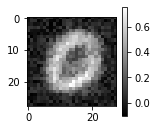

0 3


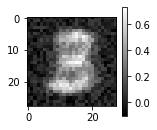

1 3


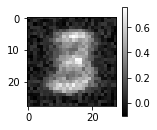

2 3


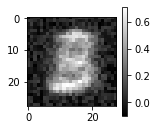

3 3


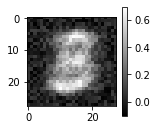

4 3


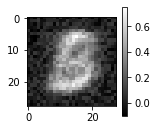

5 3


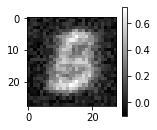

6 3


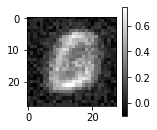

7 3


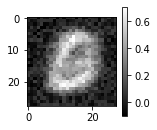

8 3


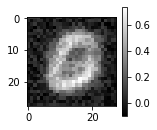

9 3


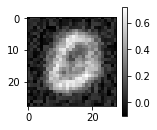

10 3


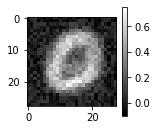

11 3


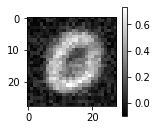

0 4


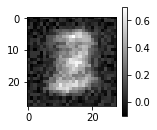

1 4


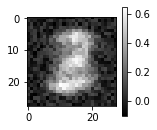

2 4


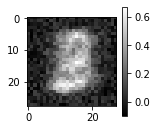

3 4


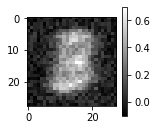

4 4


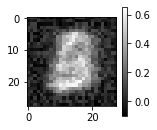

5 4


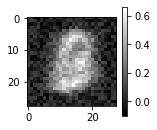

6 4


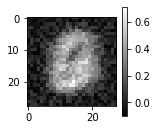

7 4


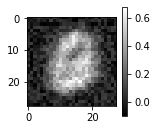

8 4


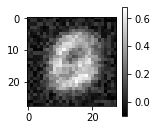

9 4


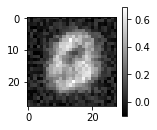

10 4


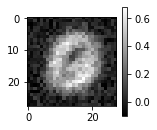

11 4


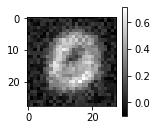

0 5


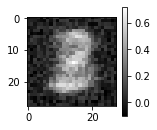

1 5


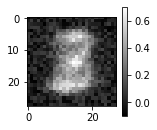

2 5


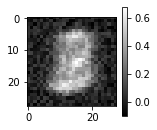

3 5


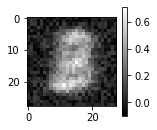

4 5


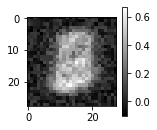

5 5


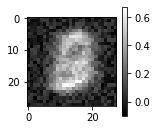

6 5


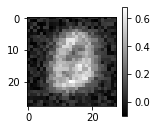

7 5


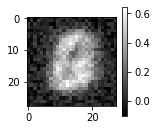

8 5


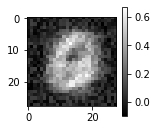

9 5


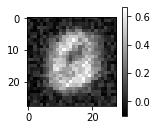

10 5


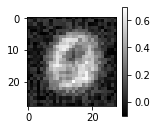

11 5


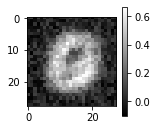

0 6


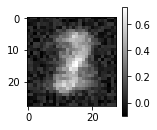

1 6


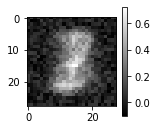

2 6


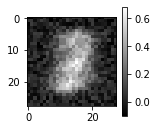

3 6


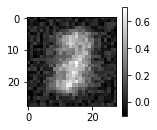

4 6


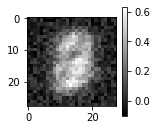

5 6


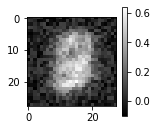

6 6


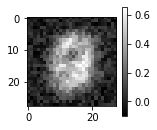

7 6


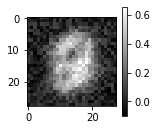

8 6


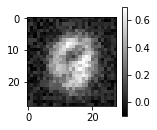

9 6


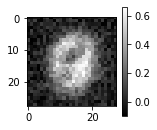

10 6


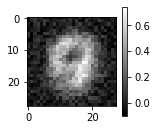

11 6


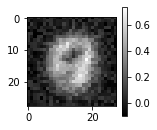

0 7


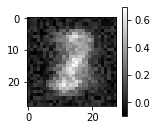

1 7


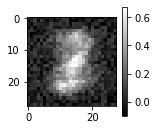

2 7


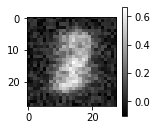

3 7


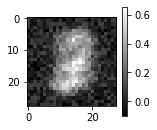

4 7


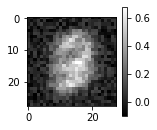

5 7


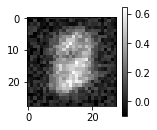

6 7


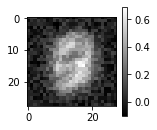

7 7


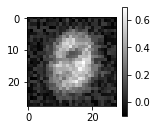

8 7


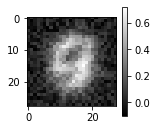

9 7


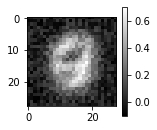

10 7


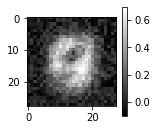

11 7


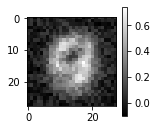

0 8


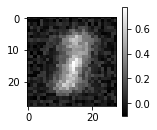

1 8


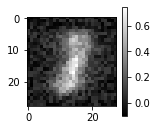

2 8


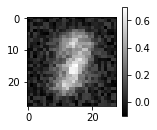

3 8


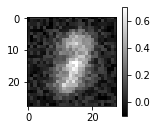

4 8


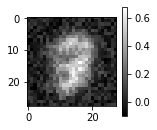

5 8


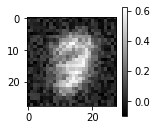

6 8


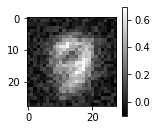

7 8


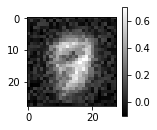

8 8


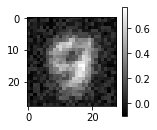

9 8


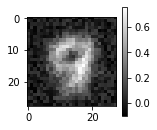

10 8


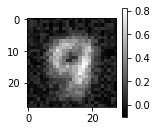

11 8


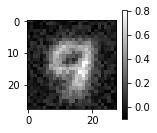

0 9


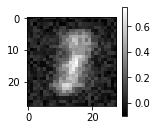

1 9


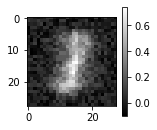

2 9


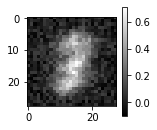

3 9


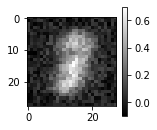

4 9


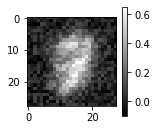

5 9


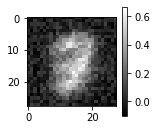

6 9


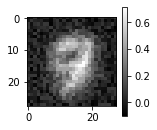

7 9


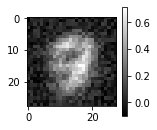

8 9


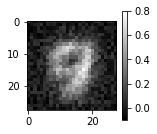

9 9


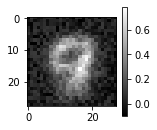

10 9


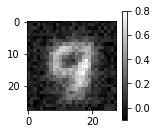

11 9


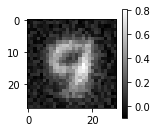

0 10


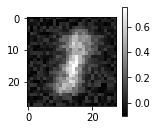

1 10


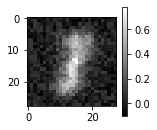

2 10


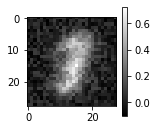

3 10


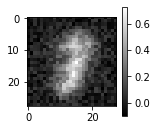

4 10


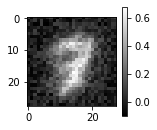

5 10


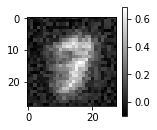

6 10


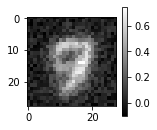

7 10


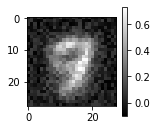

8 10


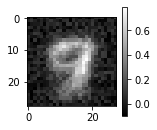

9 10


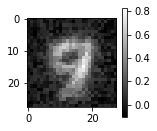

10 10


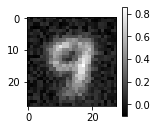

11 10


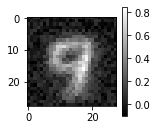

0 11


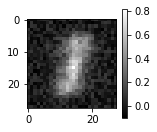

1 11


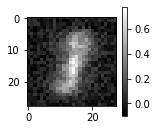

2 11


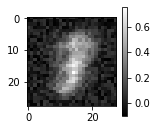

3 11


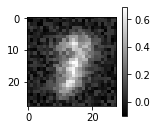

4 11


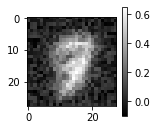

5 11


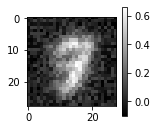

6 11


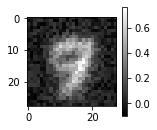

7 11


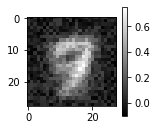

8 11


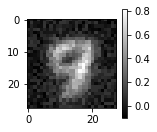

9 11


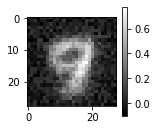

10 11


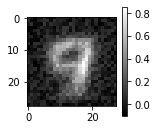

11 11


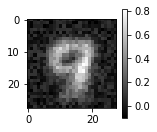

In [0]:
j=12
for i in range(j*j):
  plt.figure(figsize=(2, 2))
  heatmap = plt.imshow(x[i%j, i//j, :].reshape(28,28), cmap='gray', interpolation='nearest')
  print(i%j, i//j)
  plt.colorbar(heatmap)
  plt.show()

In [0]:
som_new = MiniSom(12, 12, 784, sigma=1.5, learning_rate=0.05) # initialization of 12x12 SOM
som_new._weights = x.copy()
som_new.train_random(X, 350000, verbose=True) # trains the SOM with 100 iterations

 [ 350000 / 350000 ] 100% - 0:00:00 left 
 quantization error: 5.475700558723301
 topographic error: 0.8808428571428571


0 0


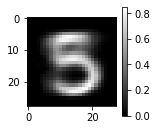

1 0


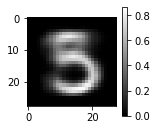

2 0


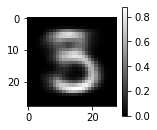

3 0


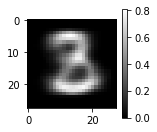

4 0


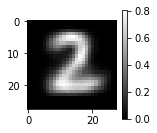

5 0


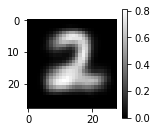

6 0


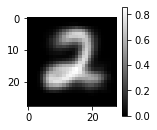

7 0


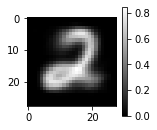

8 0


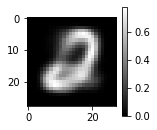

9 0


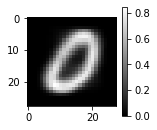

10 0


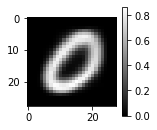

11 0


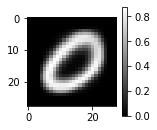

0 1


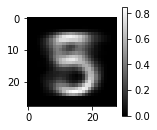

1 1


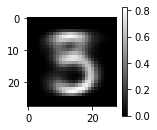

2 1


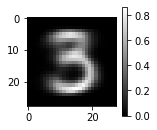

3 1


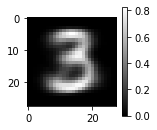

4 1


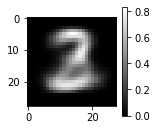

5 1


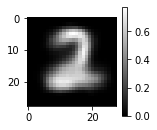

6 1


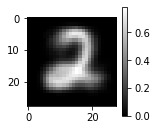

7 1


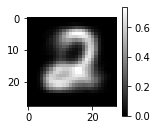

8 1


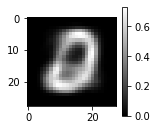

9 1


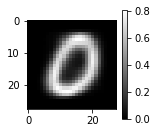

10 1


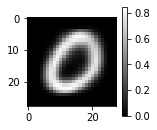

11 1


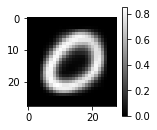

0 2


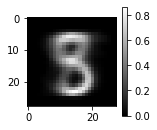

1 2


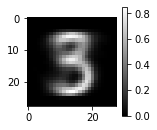

2 2


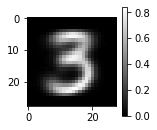

3 2


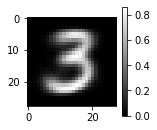

4 2


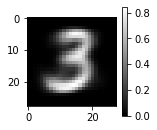

5 2


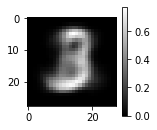

6 2


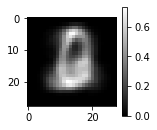

7 2


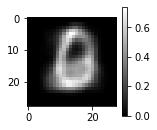

8 2


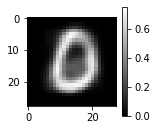

9 2


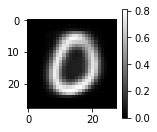

10 2


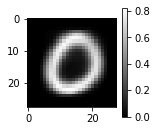

11 2


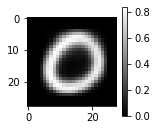

0 3


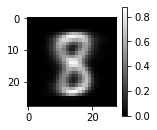

1 3


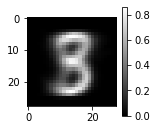

2 3


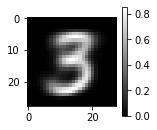

3 3


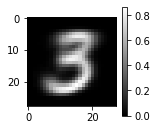

4 3


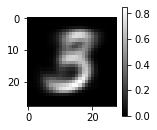

5 3


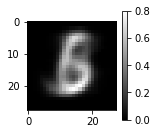

6 3


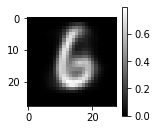

7 3


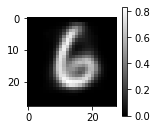

8 3


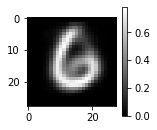

9 3


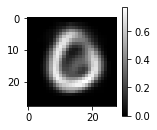

10 3


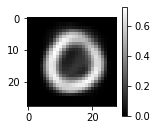

11 3


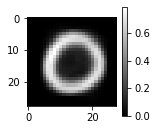

0 4


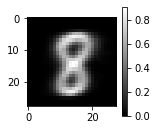

1 4


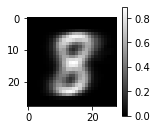

2 4


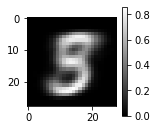

3 4


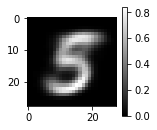

4 4


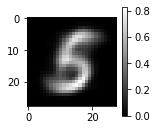

5 4


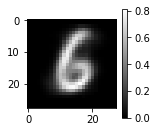

6 4


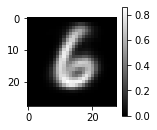

7 4


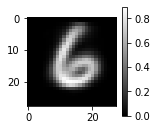

8 4


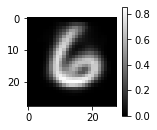

9 4


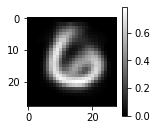

10 4


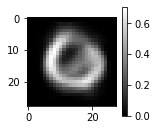

11 4


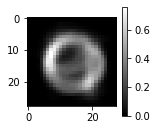

0 5


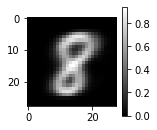

1 5


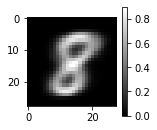

2 5


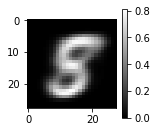

3 5


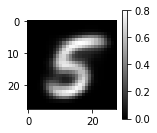

4 5


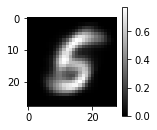

5 5


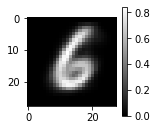

6 5


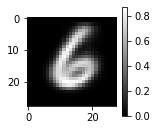

7 5


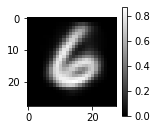

8 5


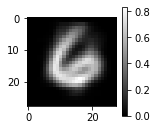

9 5


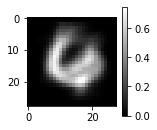

10 5


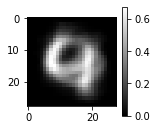

11 5


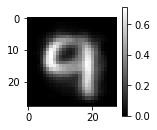

0 6


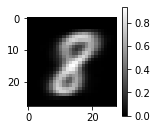

1 6


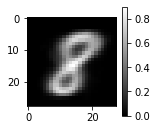

2 6


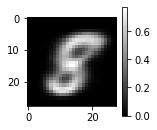

3 6


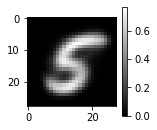

4 6


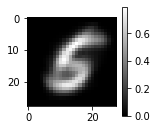

5 6


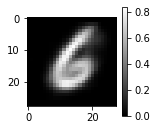

6 6


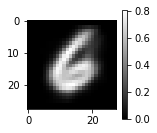

7 6


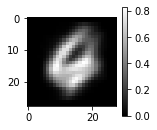

8 6


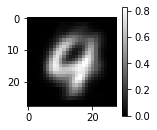

9 6


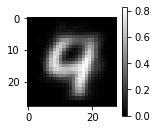

10 6


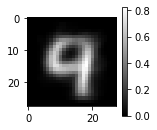

11 6


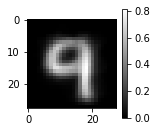

0 7


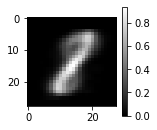

1 7


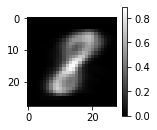

2 7


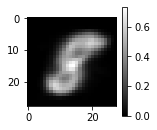

3 7


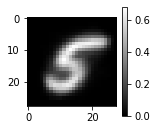

4 7


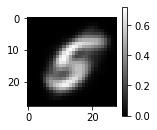

5 7


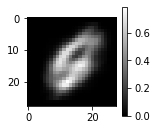

6 7


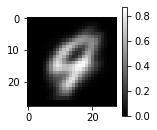

7 7


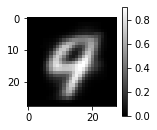

8 7


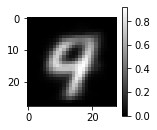

9 7


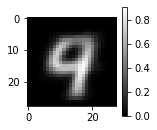

10 7


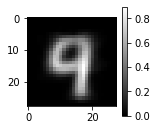

11 7


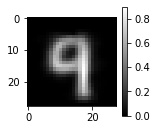

0 8


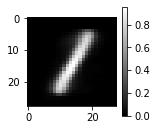

1 8


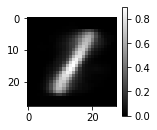

2 8


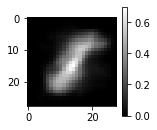

3 8


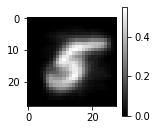

4 8


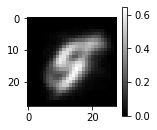

5 8


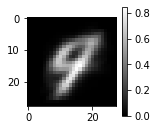

6 8


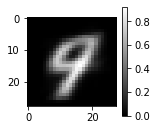

7 8


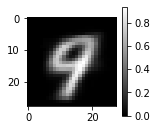

8 8


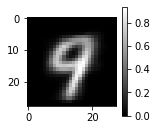

9 8


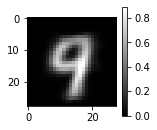

10 8


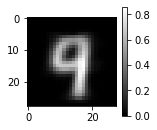

11 8


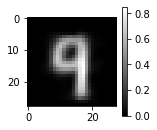

0 9


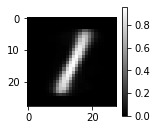

1 9


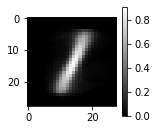

2 9


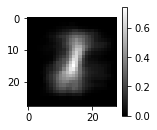

3 9


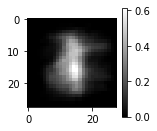

4 9


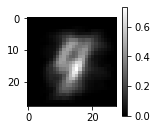

5 9


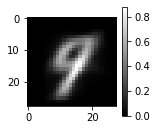

6 9


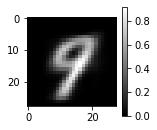

7 9


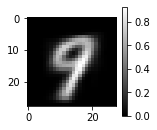

8 9


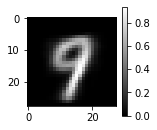

9 9


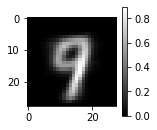

10 9


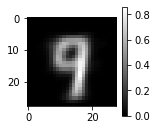

11 9


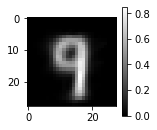

0 10


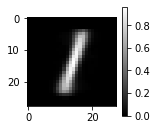

1 10


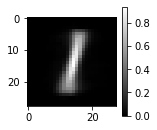

2 10


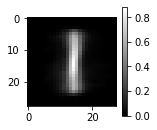

3 10


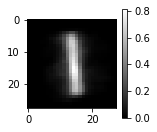

4 10


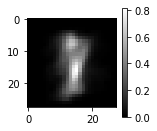

5 10


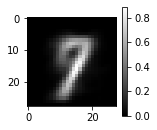

6 10


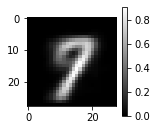

7 10


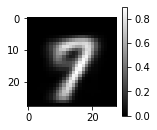

8 10


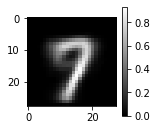

9 10


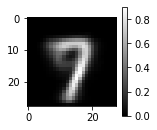

10 10


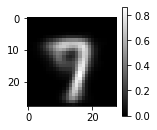

11 10


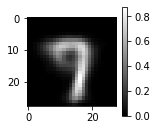

0 11


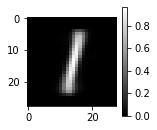

1 11


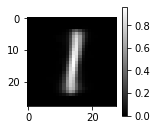

2 11


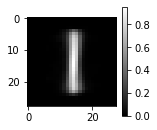

3 11


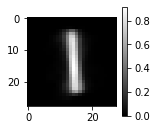

4 11


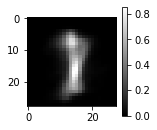

5 11


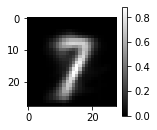

6 11


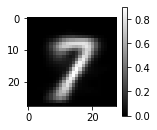

7 11


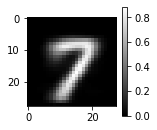

8 11


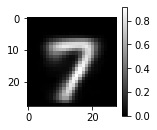

9 11


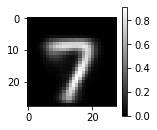

10 11


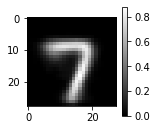

11 11


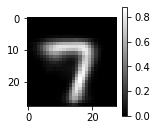

In [0]:
j=12
for i in range(j*j):
  plt.figure(figsize=(2, 2))
  heatmap = plt.imshow(som_new.get_weights()[i%j, i//j, :].reshape(28,28), cmap='gray', interpolation='nearest')
  print(i%j, i//j)
  plt.colorbar(heatmap)
  plt.show()

In [0]:
import pandas as pd
import plotly.figure_factory as ff

import plotly.graph_objects as go

for i in range(10):
  x_i = y==str(i)
  map1 = pd.DataFrame(np.zeros((12, 12)), index=range(1,13), columns=range(1,13))
  for x, t in zip(X[x_i], y[x_i]):  # scatterplot
      w = som_new.winner(x)
      map1[w[0]+1][w[1]+1] += 1
  print(i)    
  fig = ff.create_annotated_heatmap(z = map1.values, colorscale='hot', showscale=True, zmin=0, zmax=1000)
  fig.show()

0


1


2


3


4


5


6


7


8


9


In [0]:
som_new.get_weights().reshape(144,28,28)[0].shape

(28, 28)

In [0]:
winner_compilations[y[0]].append(winner_location)

In [0]:
plt.figure(figsize=(2, 2))
  heatmap = plt.imshow(som_new.get_weights()[i%j, i//j, :].reshape(28,28), cmap='gray', interpolation='nearest')
  print(i%j, i//j)
  plt.colorbar(heatmap)
  plt.show()

array([[14,  4],
       [14,  4]])

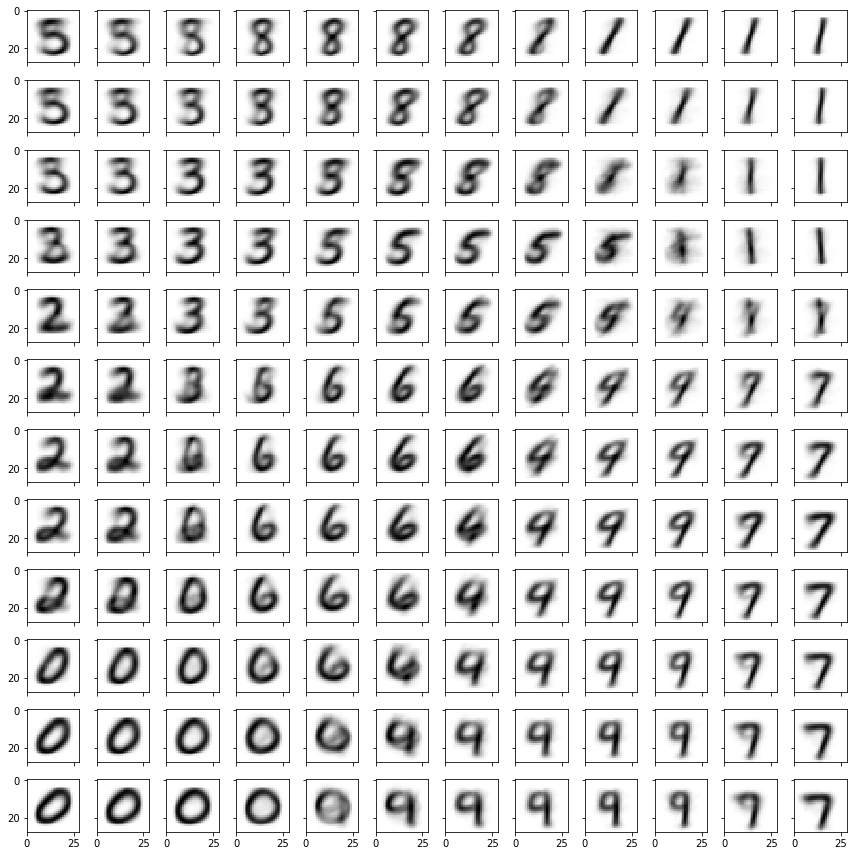

In [0]:
weight_developed = som_new.get_weights().reshape(144,28,28).copy()
ig, axes = plt.subplots(12,12, 
                         figsize=(12,12),
                         sharex=True, sharey=True
                         )#,subplot_kw=dict(adjustable='box-forced', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

for i in range(144):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//12 
    subplot_col = i%12  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = weight_developed[i]
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [0]:
som_direct = MiniSom(12, 12, 784, sigma=3.0, learning_rate=0.1) # initialization of 12x12 SOM
som_direct.train_random(X, 700000, verbose=True) # trains the SOM with 100 iterations

 [ 700000 / 700000 ] 100% - 0:00:00 left 
 quantization error: 5.979167797193405
 topographic error: 0.6731571428571429


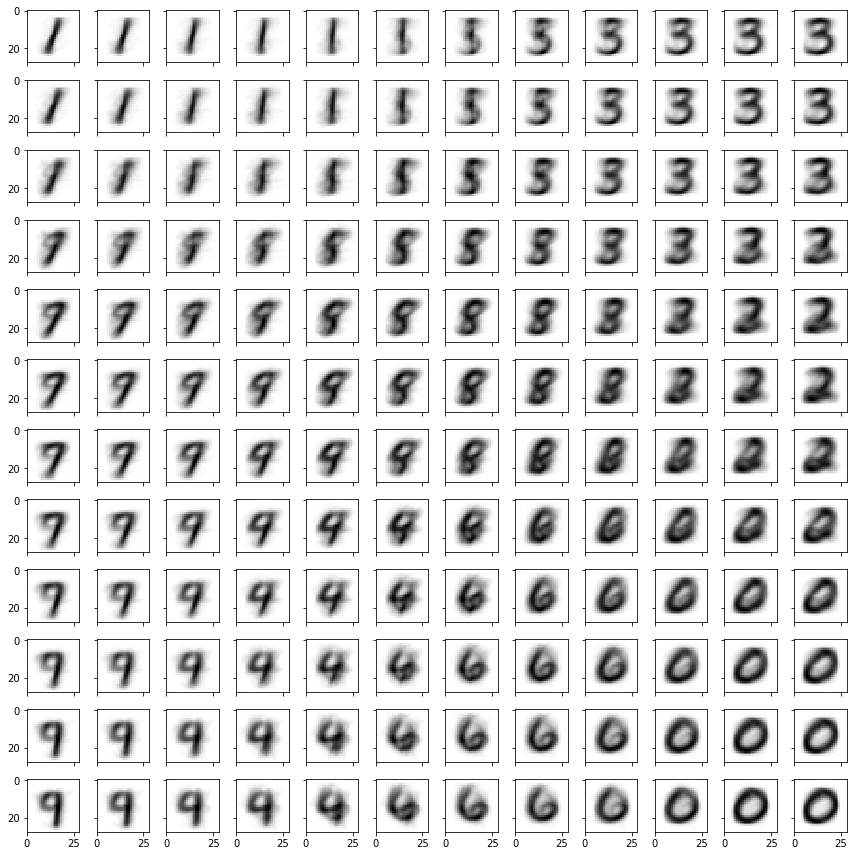

In [0]:
weight_developed = som_direct.get_weights().reshape(144,28,28).copy()
ig, axes = plt.subplots(12,12, 
                         figsize=(12,12),
                         sharex=True, sharey=True
                         )#,subplot_kw=dict(adjustable='box-forced', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

for i in range(144):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//12 
    subplot_col = i%12  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = weight_developed[i]
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [0]:
(np.arange(4)*np.arange(16).reshape(4,4)).T

array([[ 0,  0,  0,  0],
       [ 1,  5,  9, 13],
       [ 4, 12, 20, 28],
       [ 9, 21, 33, 45]])

In [0]:
(np.arange(4)*np.arange(16).reshape(4,4))[:,1]

array([ 1,  5,  9, 13])

References:                                                                            
http://cs231n.github.io/python-numpy-tutorial/                       
https://scikit-learn.org/stable/_downloads/scikit-learn-docs.pdf